In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import pickle

with open('../BIGCON_DATA_ver1.2/CJ_DATA.bin', 'rb') as f:
    cj_data = pickle.load(f) 
with open('../BIGCON_DATA_ver1.2/GS_DATA.bin', 'rb') as f:
    gs_data = pickle.load(f) 
with open('../BIGCON_DATA_ver1.2/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f)     
with open('../BIGCON_DATA_ver1.2/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
with open('../BIGCON_DATA_ver1.2/WS_DATA.bin', 'rb') as f:
    ws_data = pickle.load(f) 

In [5]:
print(cj_data.keys())
print(gs_data.keys())
print(sk_data.keys())
print(sh_data.keys())
print(ws_data.keys())

dict_keys(['CJ_DATA', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['GS_TOTAL', 'GS_CATEGORY', 'GS_DONG', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['SK_AGE', 'SK_TIME', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['WS_MENTION', 'WS_SENTIMENT', 'WS_TOPIC', 'COL_CHANGE_DICT', 'INDUSTRY_CODE_DICT', 'GEO_CODE_DICT'])


# 개인 해 올 것들
## SK_TIME 데이터 (9-14 / 15-20)
- 시간대별 동별 유동인구 그래프

1. 동을 합치기(ex_공릉 1동 2동 3동을 -> 공릉동으로) => 하는 건지 안하는 건ㄴ지 모르겠음
2. 2019년도 2020년도 쪼개기
3. 7일간으로 차이 구하기
4. 그래프 찍기

### 데이터 로드 및 2019/2020년 쪼개기

In [9]:
sk_time = sk_data['SK_TIME']
sk_2019 = sk_time.query('(YEAR == 2019)')
sk_2020 = sk_time.query('(YEAR == 2020)')

sk_list = sk_time.iloc[:,15:-6].columns

### 동 이름 합치기(ex. 공릉1동, 공릉2동 => 공릉동)

In [10]:
def change_dong_name(HDONG_NM, HDONG_NM_new,df):
    for i in range(len(HDONG_NM)):
        ad = HDONG_NM[i]
        ad_n = HDONG_NM_new[i]
        for a in ad:
            df['DONG_NM'] = df['DONG_NM'].replace(a, ad_n)
    return df

In [11]:
HDONG_NM = [['고산1동', '고산2동', '고산3동'], ['두산동'], ['만촌1동', '만촌2동', '만촌3동'], ['범물1동', '범물2동'],
      ['범어1동', '범어2동', '범어3동', '범어4동'], ['수성1가동', '수성2.3가동', '수성4가동'], ['중동'],
      ['지산1동', '지산2동'], ['황금1동', '황금2동'], ['남산1동', '남산2동', '남산3동', '남산4동'], ['동인동'], ['삼덕동'],
      ['성내1동', '성내2동', '성내3동'], ['공릉1동', '공릉2동'], ['상계10동', '상계8동', '상계1동', '상계2동',
      '상계3.4동', '상계5동', '상계6.7동', '상계9동'], ['월계1동', '월계2동', '월계3동'], ['중계1동',
      '중계2.3동', '중계4동', '중계본동'], ['하계1동', '하계2동'], ['광희동'], ['다산동'], ['동화동'],
      ['명동'], ['소공동'], ['신당5동'], ['신당동'], ['약수동'], ['을지로동'], ['장충동'], ['중림동'], ['청구동'],
      ['필동'], ['황학동'], ['회현동'], ['대신동'], ['대봉1동', '대봉2동'], ['상동'], ['파동']]
HDONG_NM_new = ['고산동','두산동','만촌동', '범물동', '범어동', '수성동', '중동', '지산동', '황금동', '남산동', '동인동', 
            '삼덕동', '성내동', '공릉동', '상계동', '월계동', '중계동', '하계동', '광희동', '다산동', '동화동', '명동', 
            '소공동', '신당5동', '신당동', '약수동', '을지로동', '장충동', '중림동', '청구동', '필동', '황학동', '회현동', '대신동', '대봉동', '상동', '파동']

sk_2019 = change_dong_name(HDONG_NM, HDONG_NM_new,sk_2019 )
sk_2020 = change_dong_name(HDONG_NM, HDONG_NM_new,sk_2020 )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# 2019년 서울/대구 분할
sk_2019_s = sk_2019.query('(SI_CODE == "11")')
sk_2019_d = sk_2019.query('(SI_CODE == "27")')
# 2020년 서울/대구 분할
sk_2020_s = sk_2020.query('(SI_CODE == "11")')
sk_2020_d = sk_2020.query('(SI_CODE == "27")')

### 동별 유동인구 함수

In [32]:
def processing_plot(sk_df, year):
    dong_list = sk_df['DONG_NM'].unique()
    for dname in dong_list:
        sk_dong = sk_df.query("DONG_NM == @dname")
        sk_9_14 = pd.DataFrame({'TMST_9_14' : sk_dong.groupby('DATE')[sk_list[:6]].sum().sum(axis=1)})
        sk_15_20 = pd.DataFrame({'TMST_15_20' : sk_dong.groupby('DATE')[sk_list[-6:]].sum().sum(axis=1)})
        sk_dong_popul = pd.merge(sk_9_14, sk_15_20, left_index=True, right_index=True, how='left')
        sk_dong_popul = sk_dong_popul.reset_index()
        
        sk_dong_popul['TMST_9_14_diff'] = sk_dong_popul['TMST_9_14'] - sk_dong_popul['TMST_9_14'].shift(7)
        sk_dong_popul['TMST_15_20_diff'] = sk_dong_popul['TMST_15_20'] - sk_dong_popul['TMST_15_20'].shift(7)

        plt.figure(figsize=(30, 6))
        plt.subplot(1,2,1)
        plt.stem(sk_dong_popul['DATE'], sk_dong_popul['TMST_9_14_diff'])
        plt.title(year+dname+' 9~14')
        plt.grid(axis ='x')
        plt.subplot(1,2,2)
        plt.stem(sk_dong_popul['DATE'], sk_dong_popul['TMST_15_20_diff'])
        plt.title(year+dname+' 15~20')
        plt.grid(axis ='x')
        
        if year.split('_')[0] == '2019':
            plt.savefig('./sk_img/sk_img_2019/'+year+dname+'.png')
        else:
            plt.savefig('./sk_img/sk_img_2020/'+year+dname+'.png')

#####  2019년도 동별 유동인구

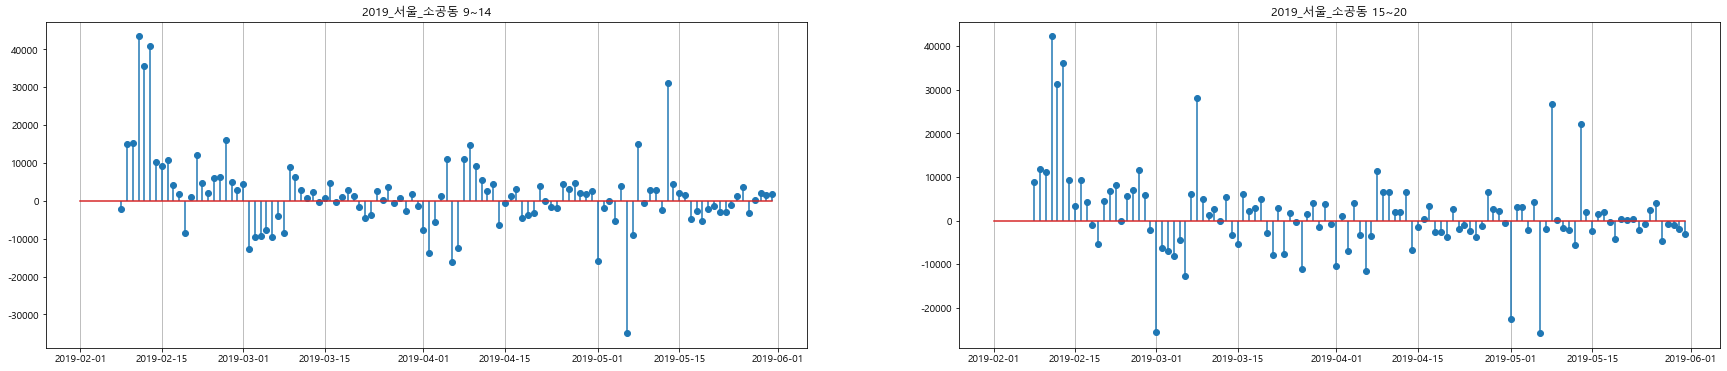

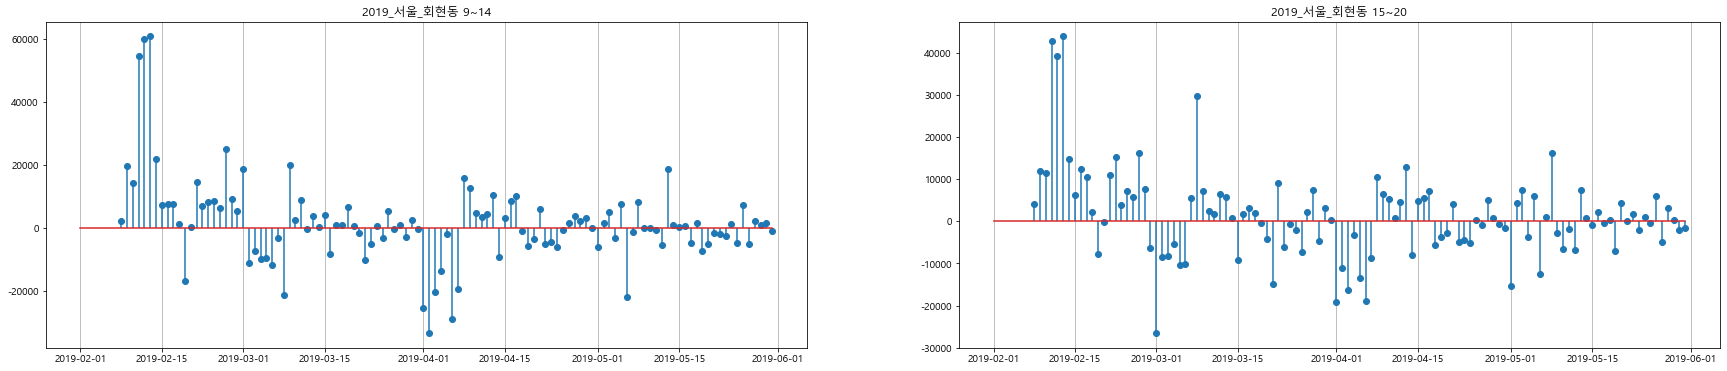

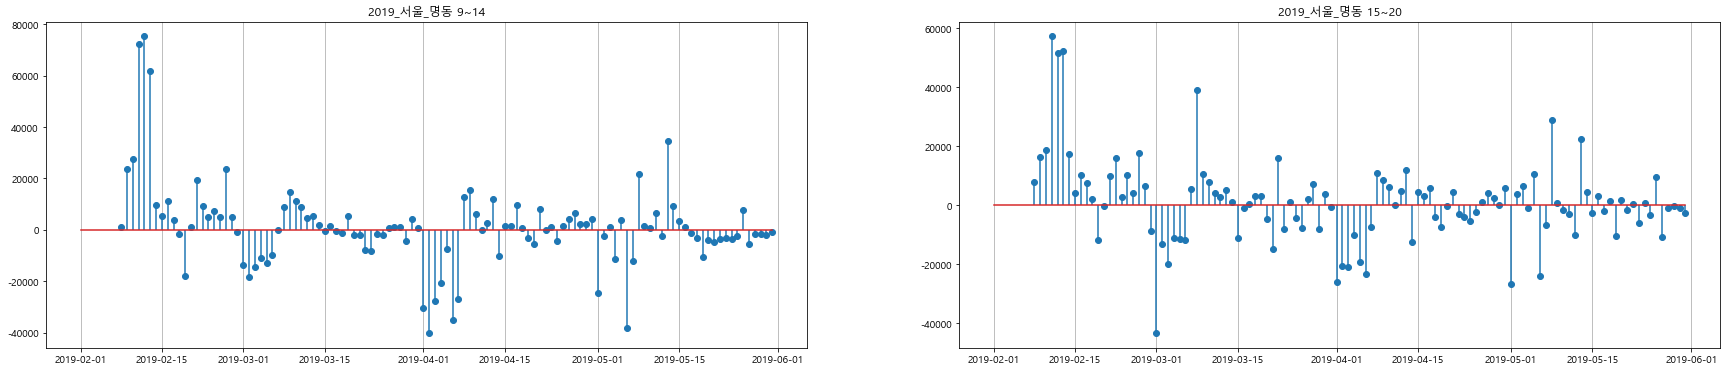

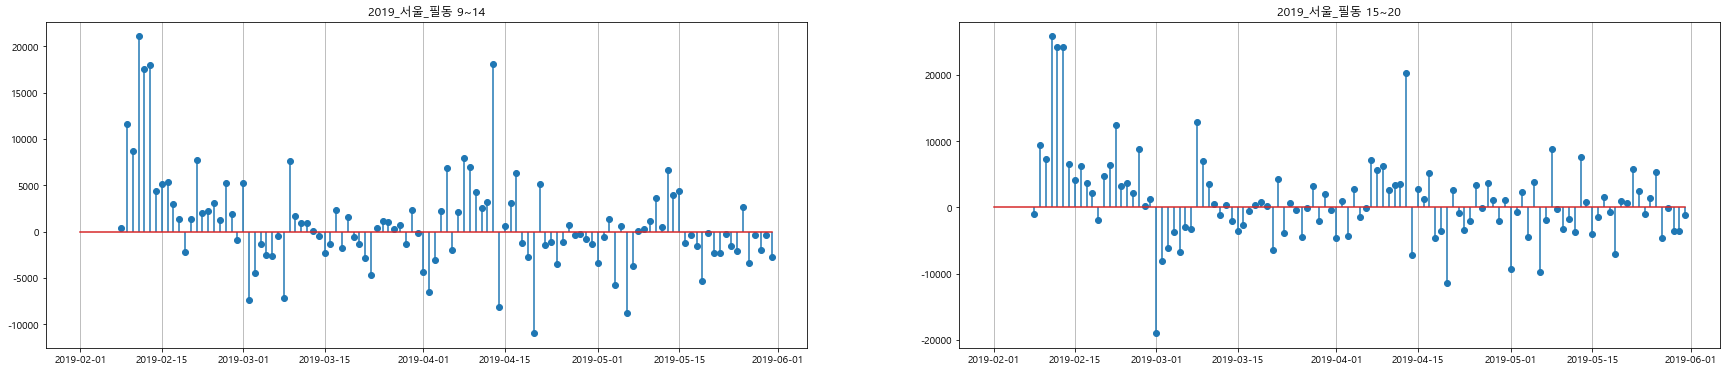

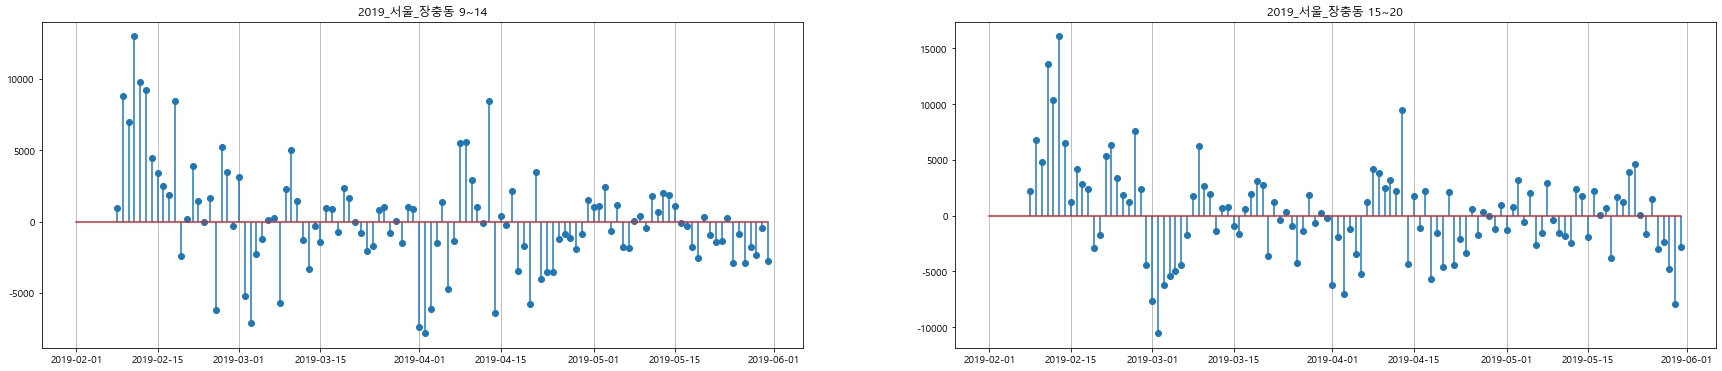

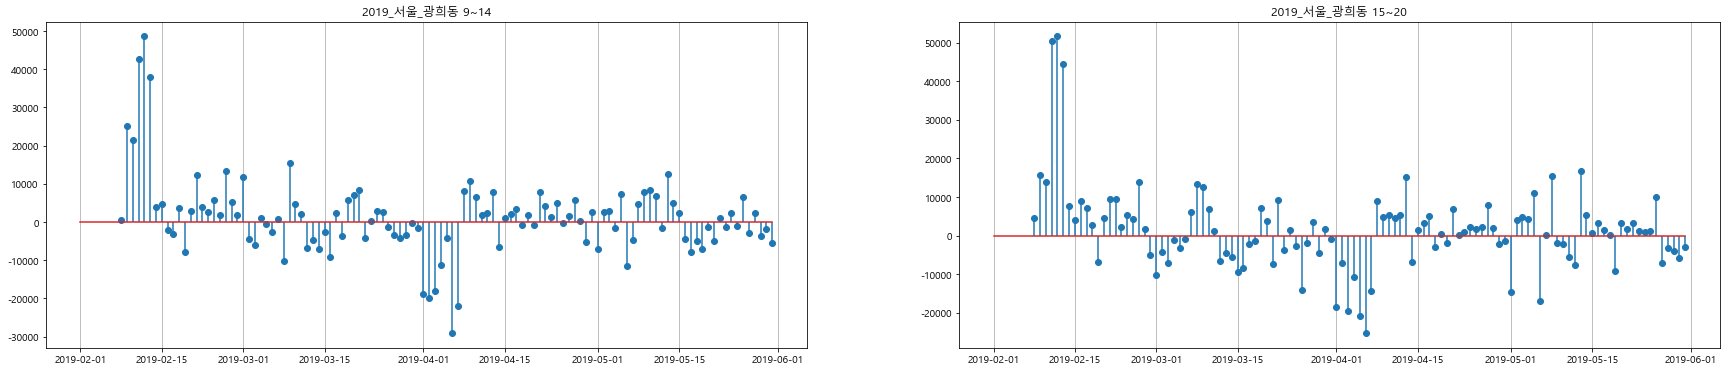

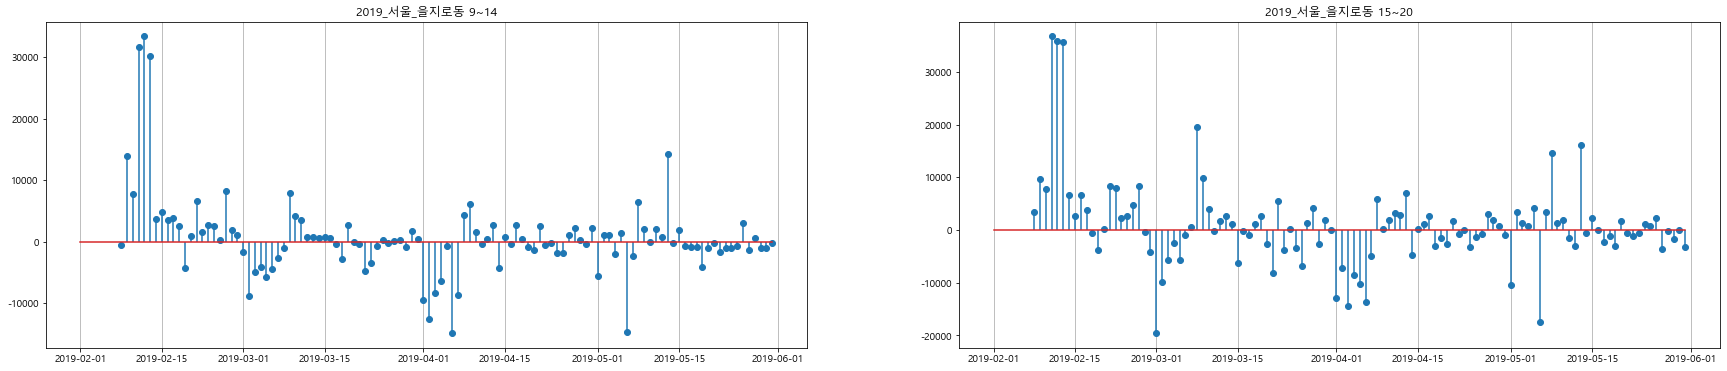

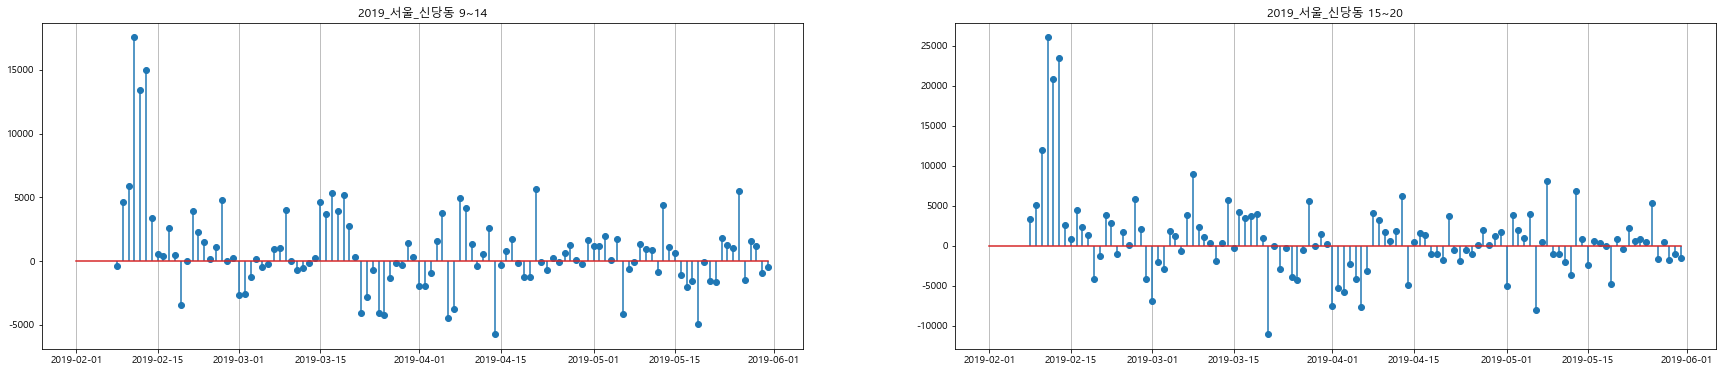

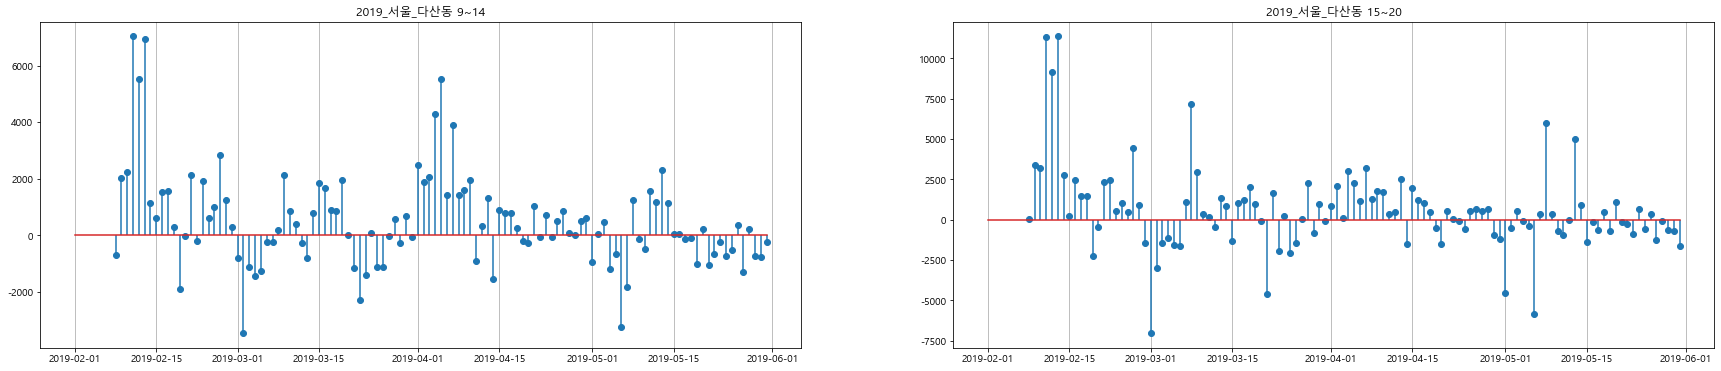

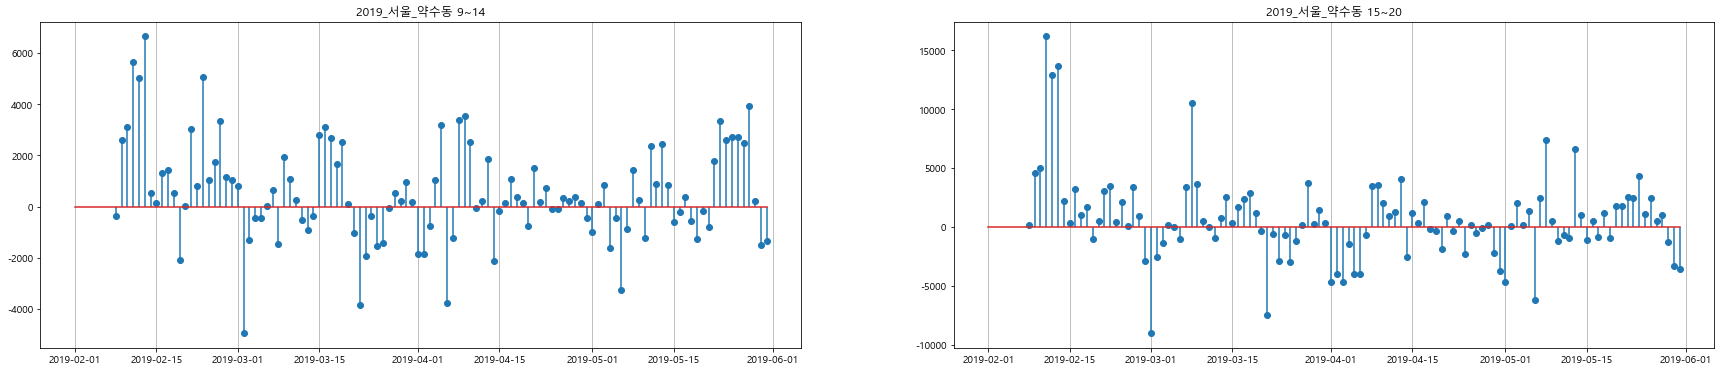

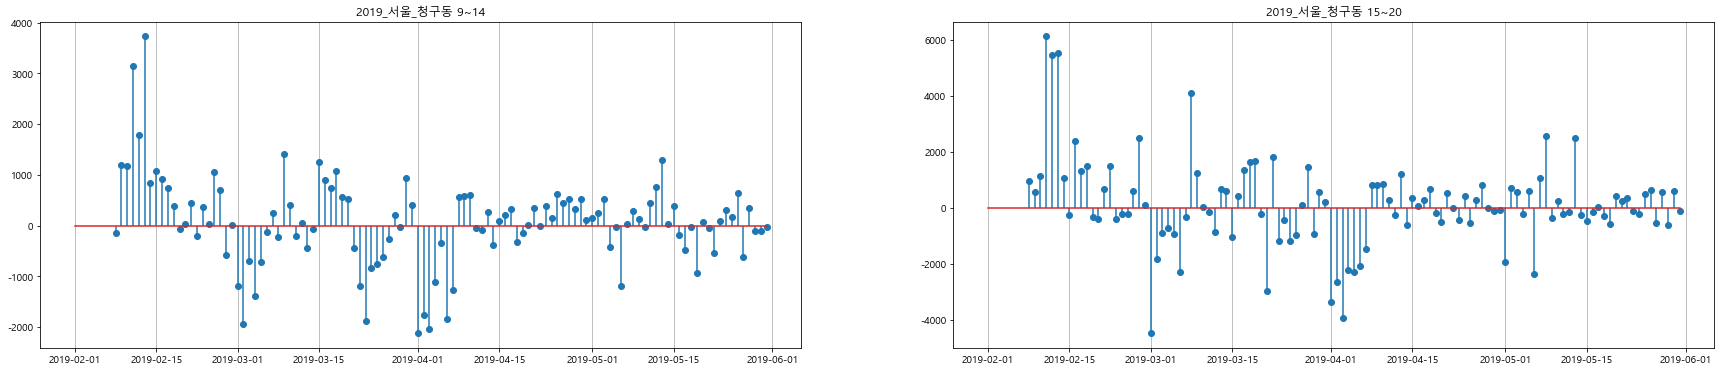

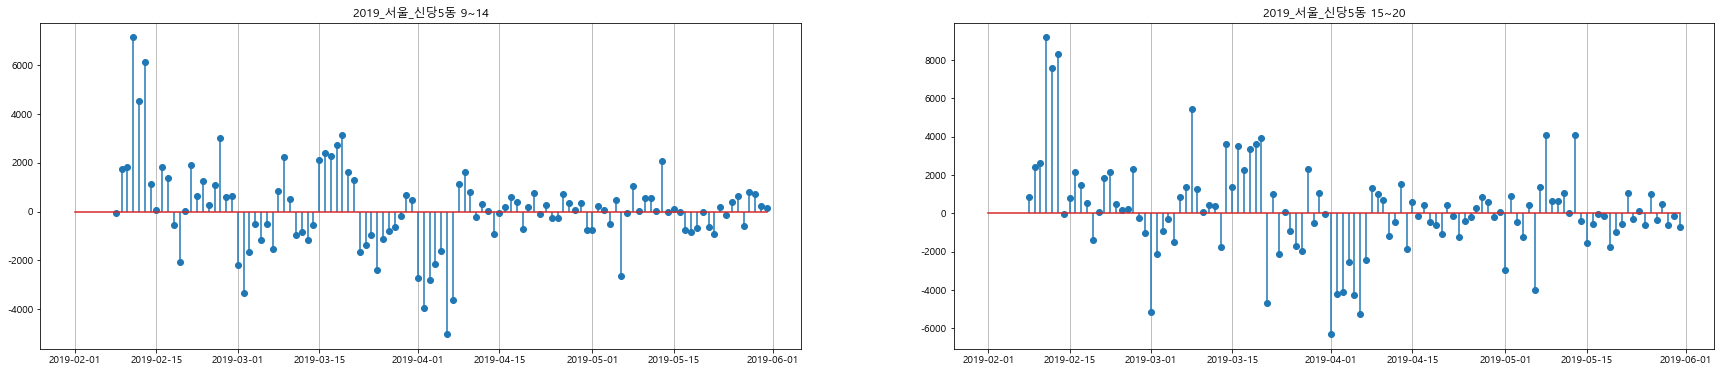

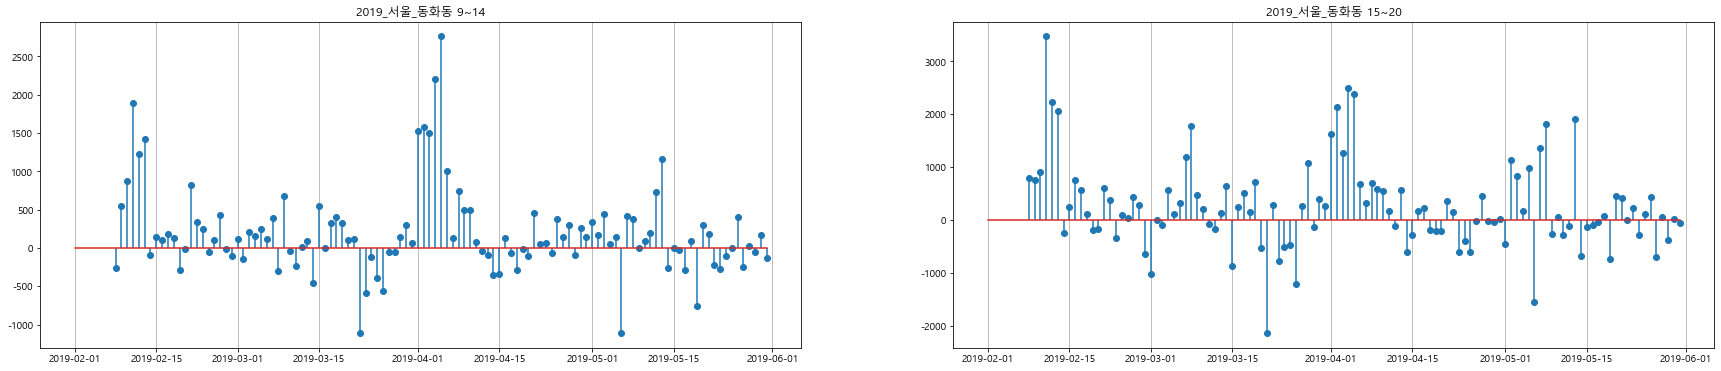

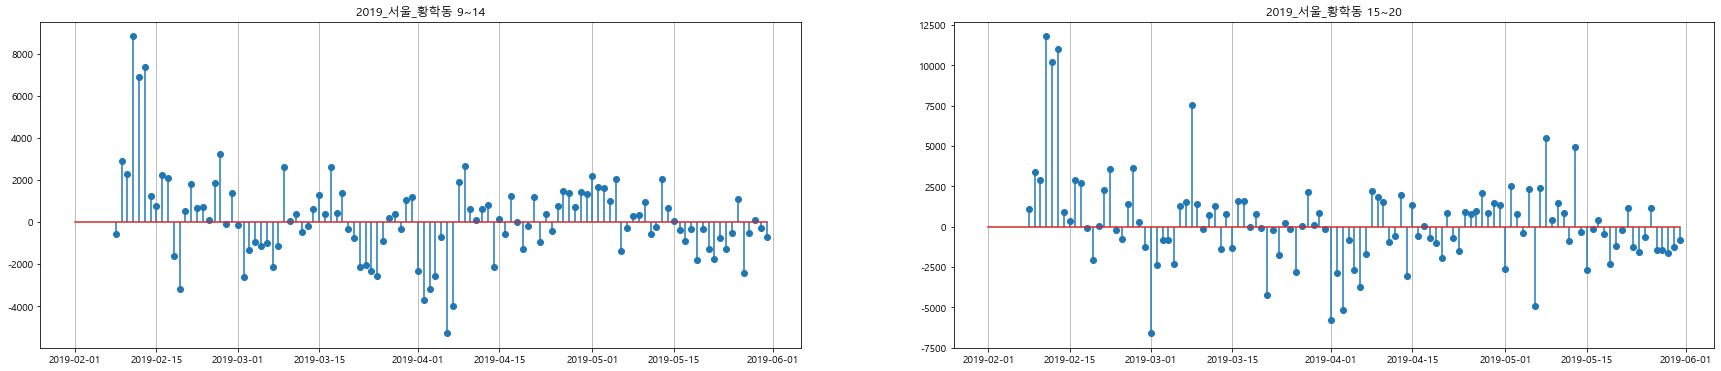

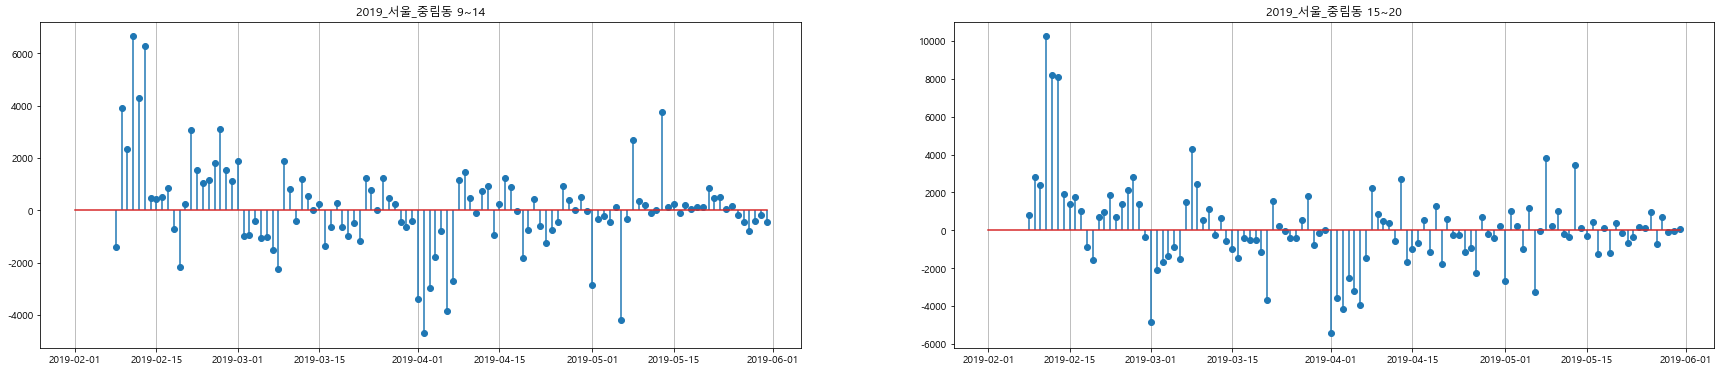

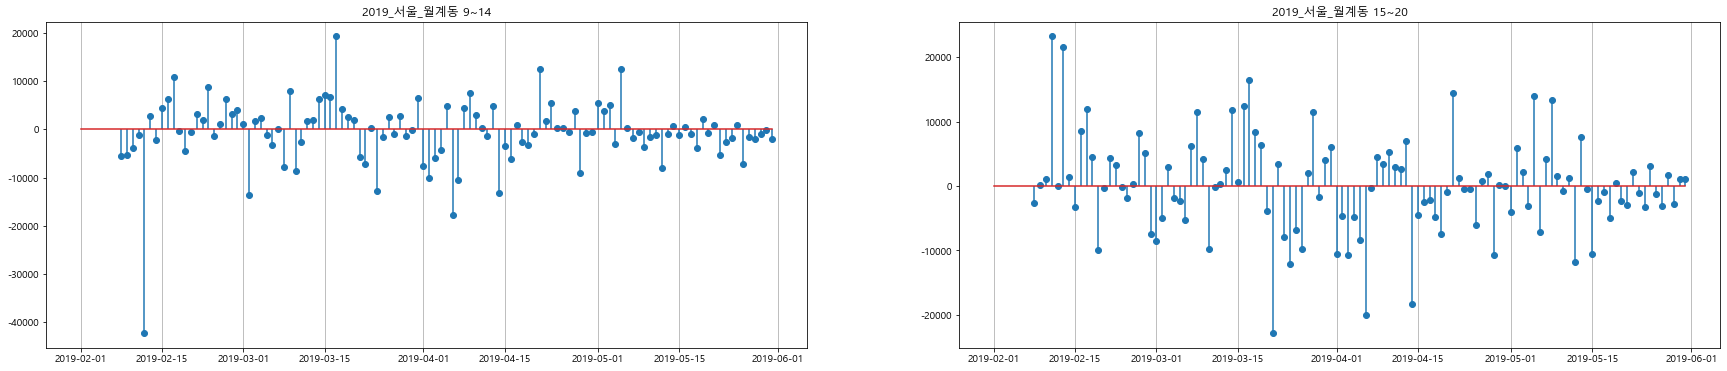

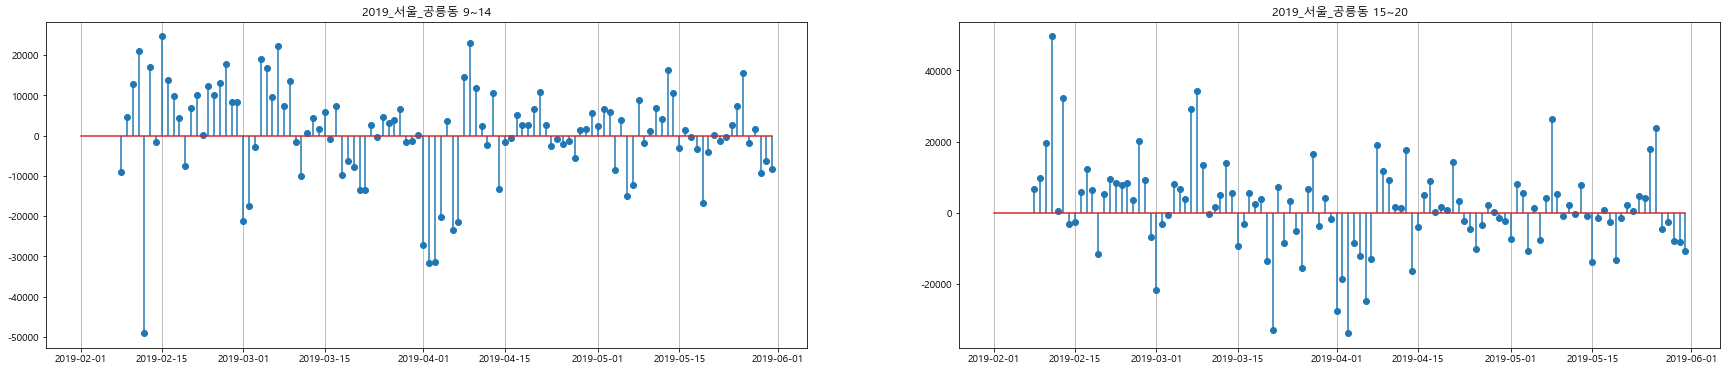

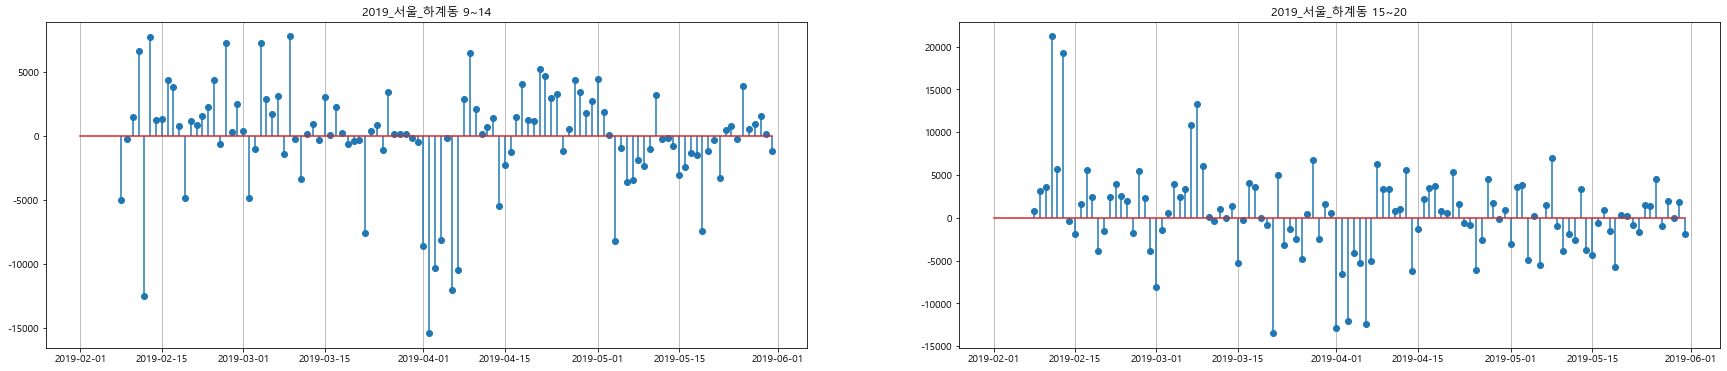

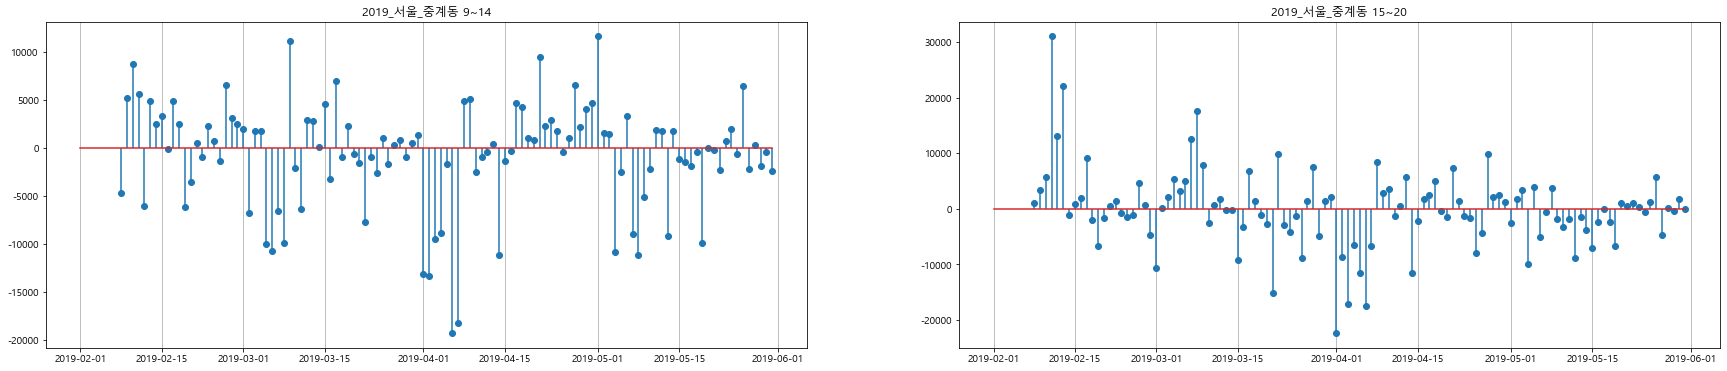

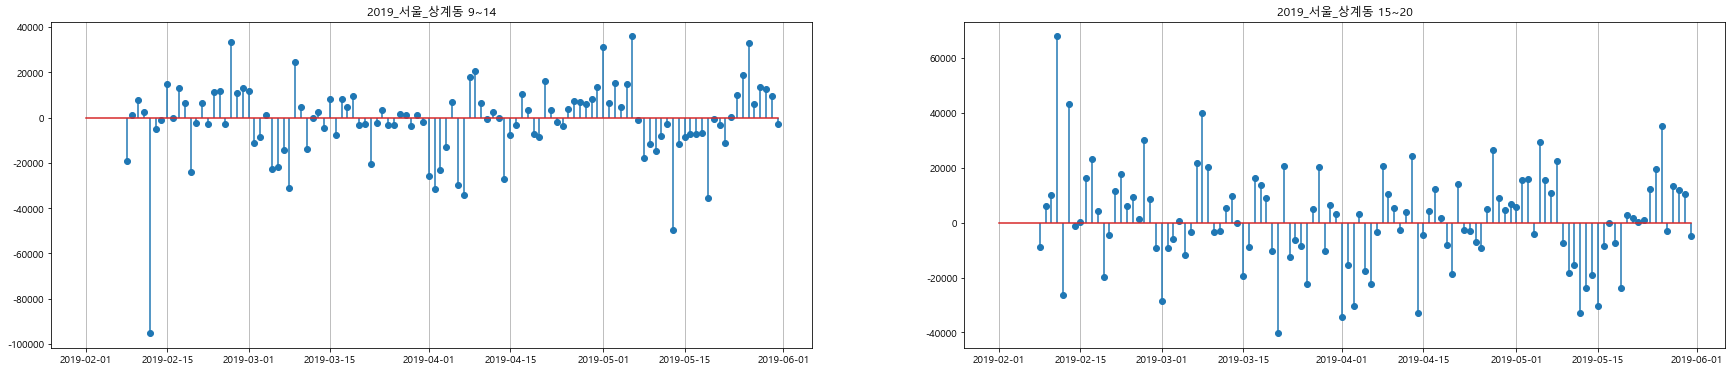

In [33]:
# 서울
processing_plot(sk_2019_s,'2019_서울_')

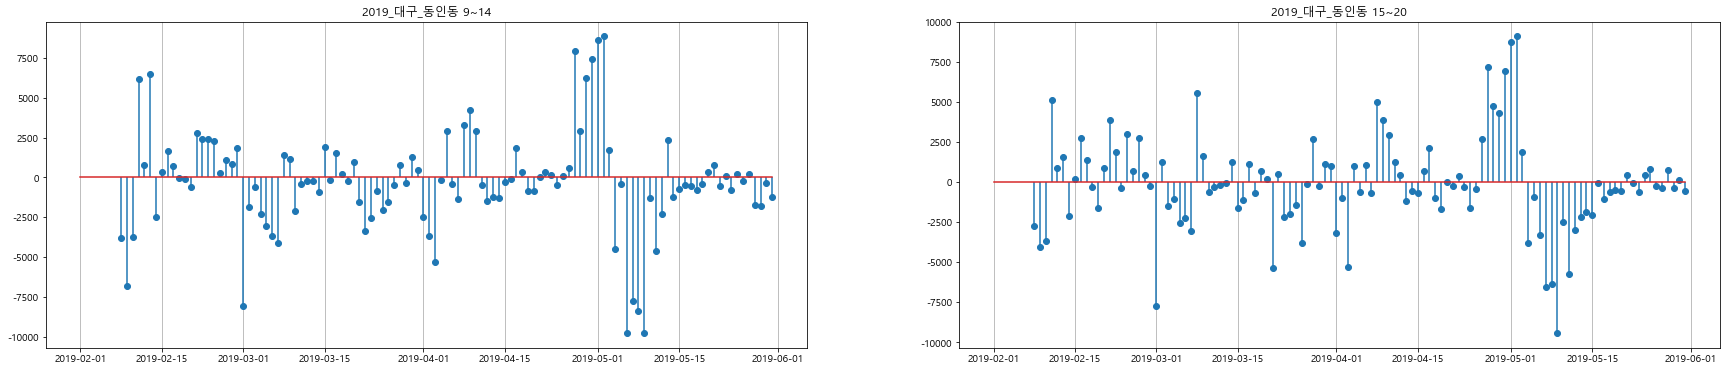

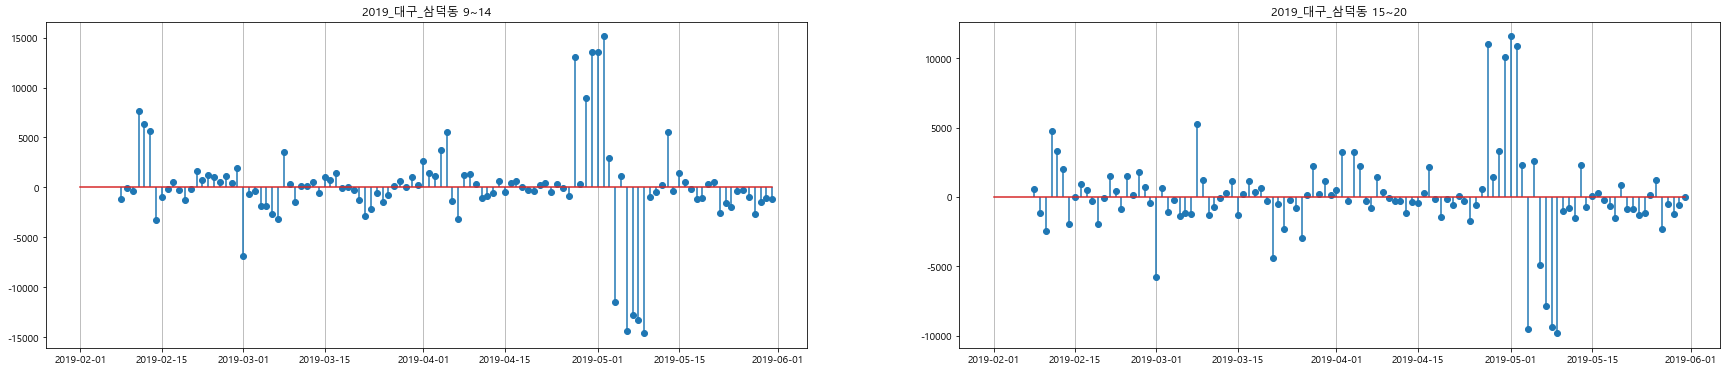

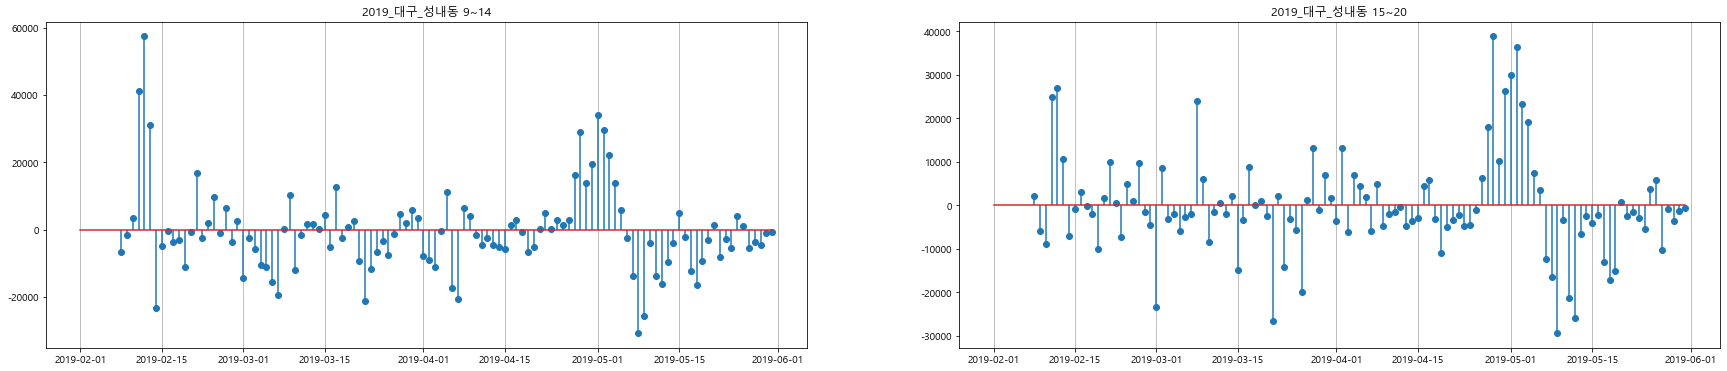

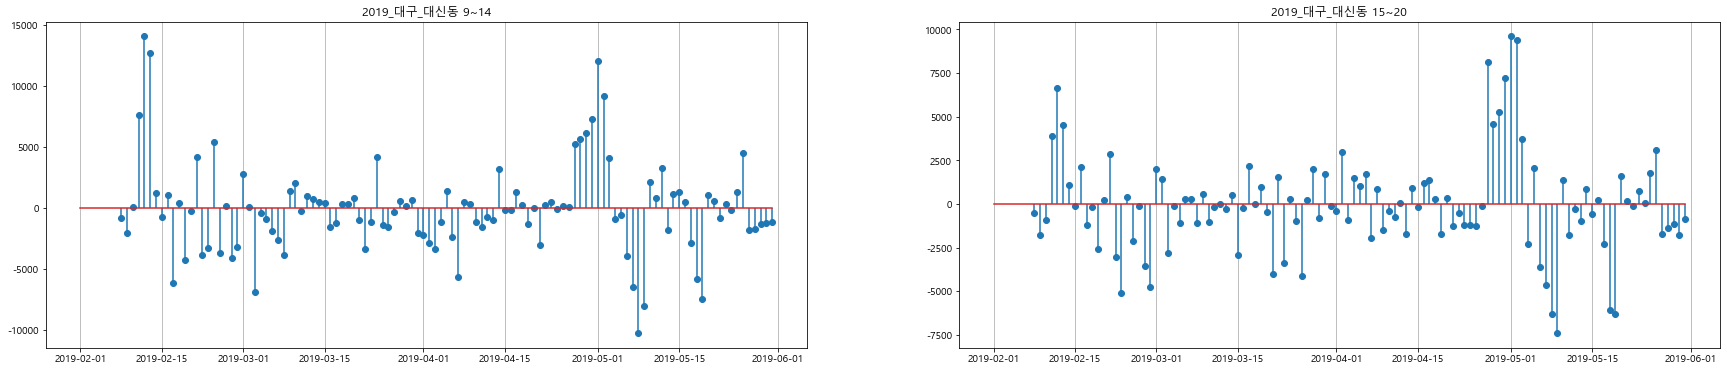

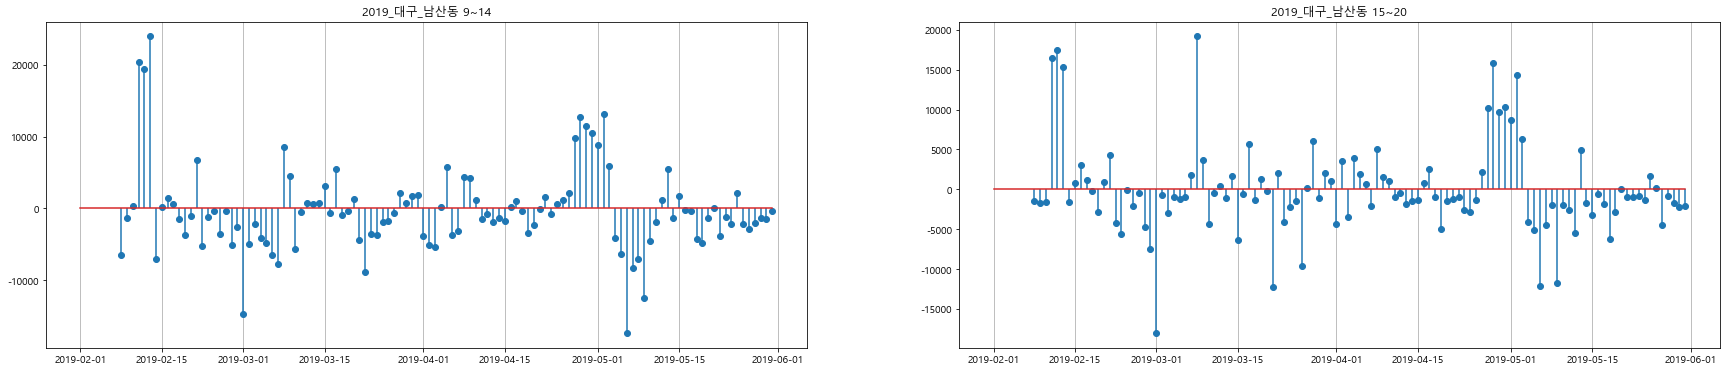

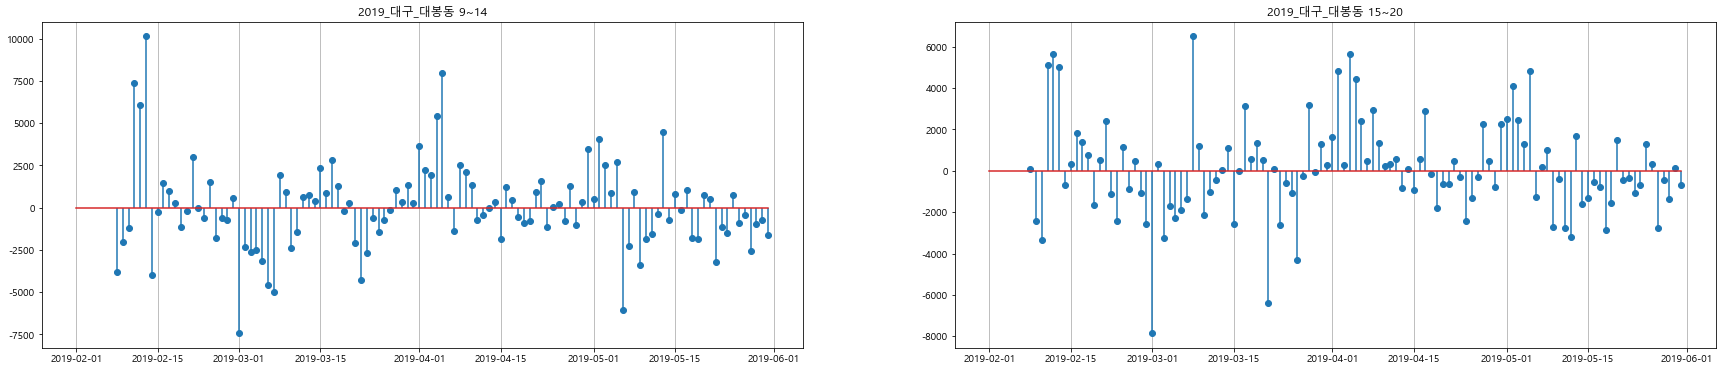

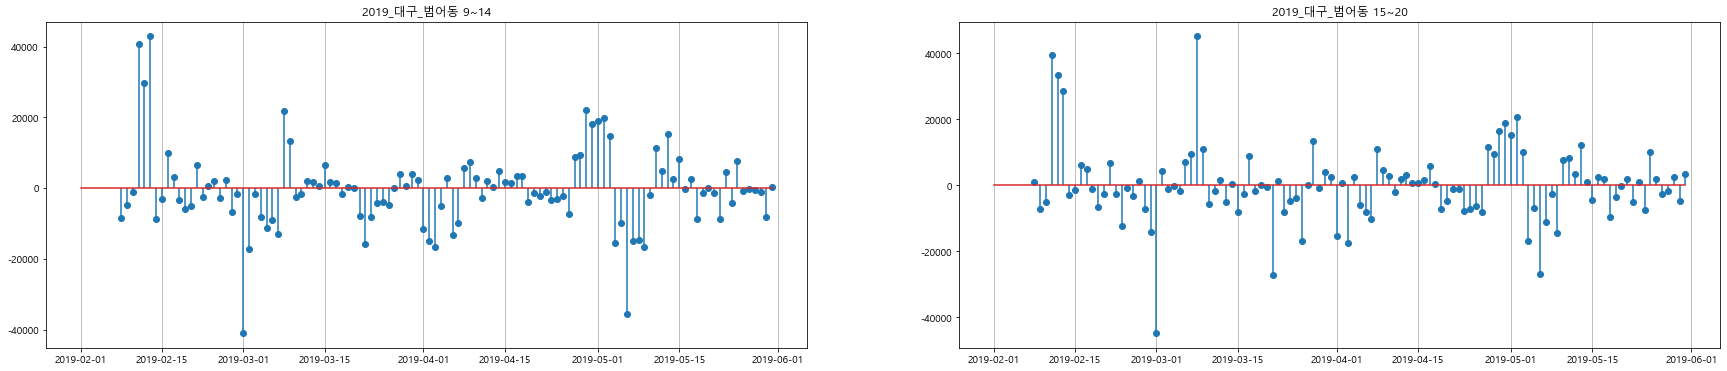

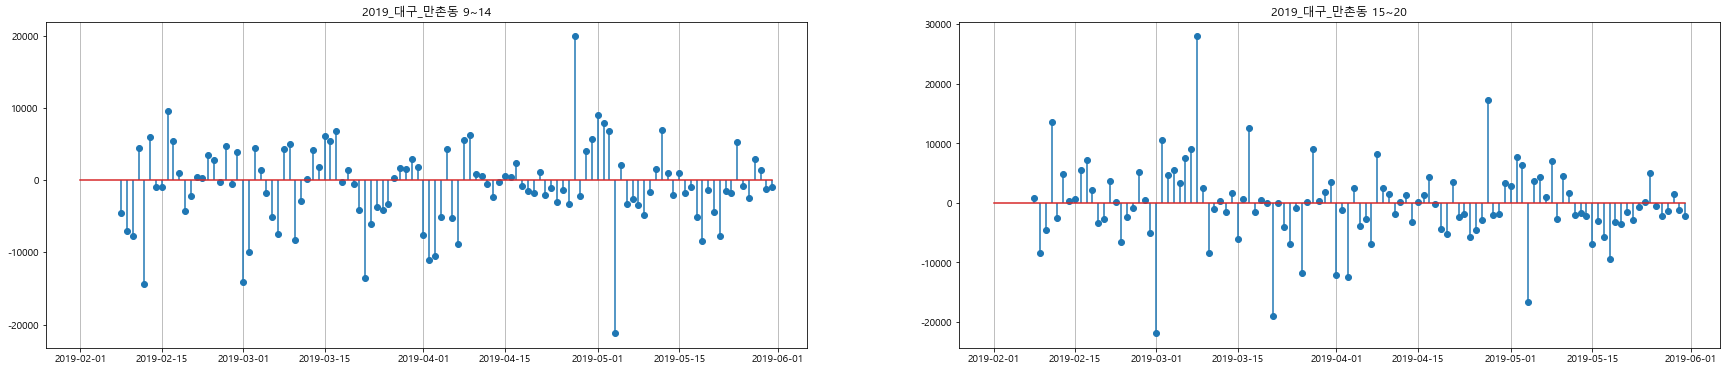

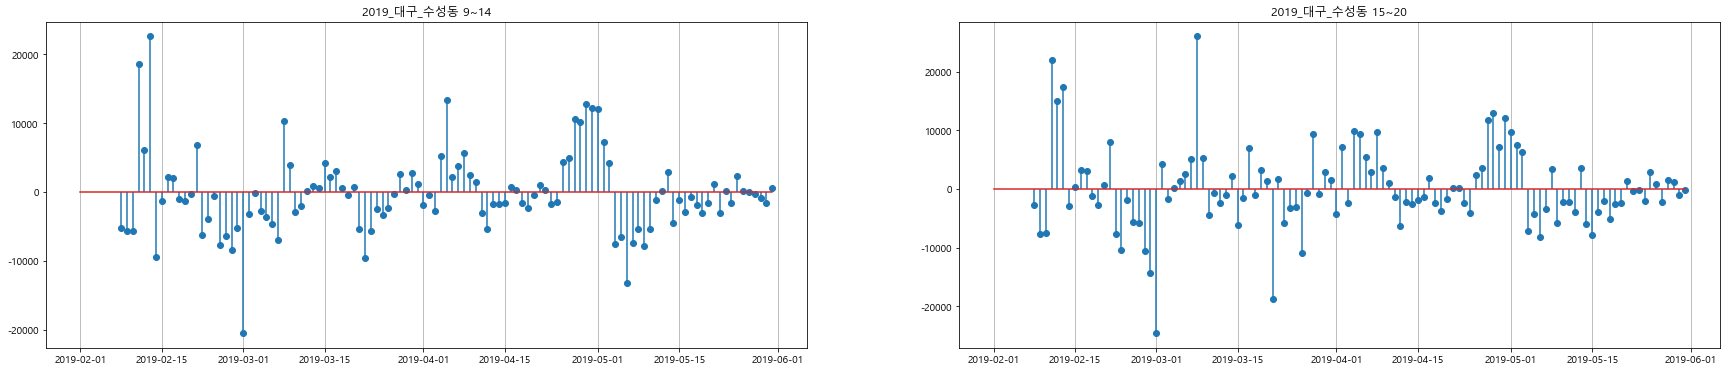

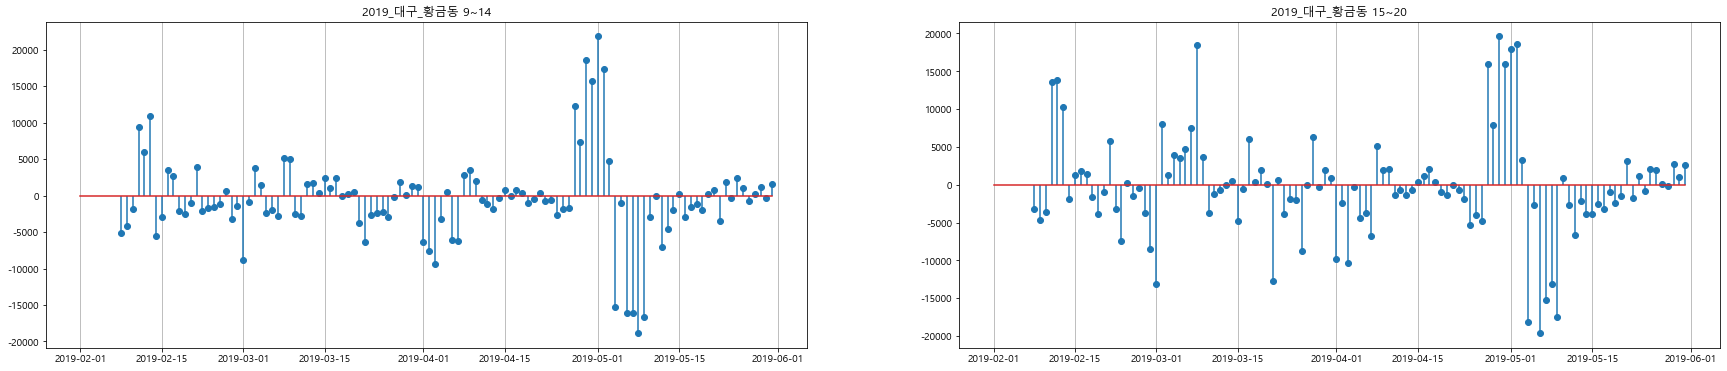

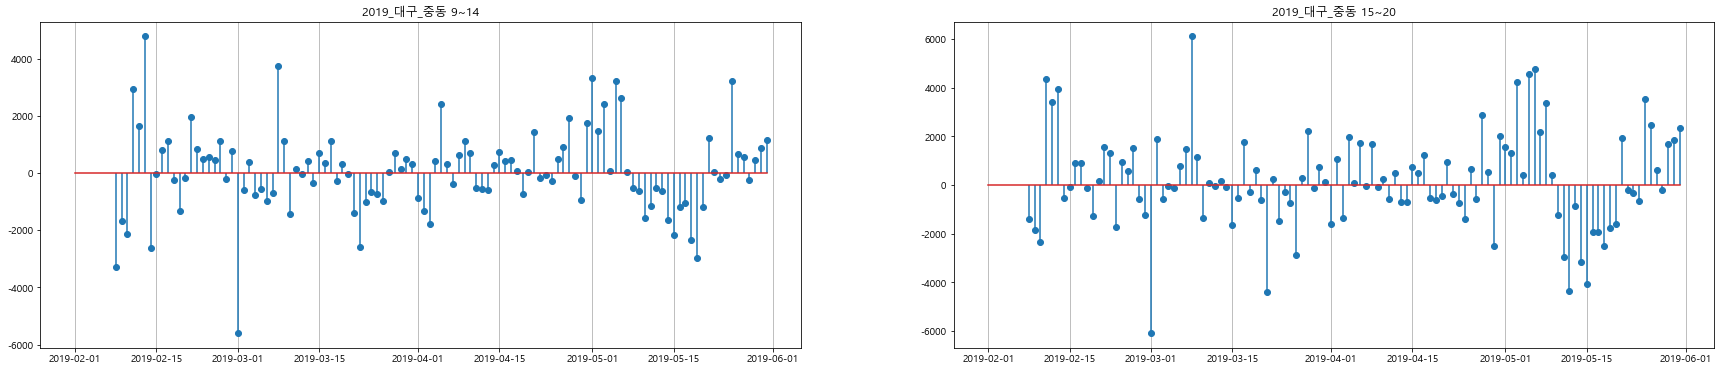

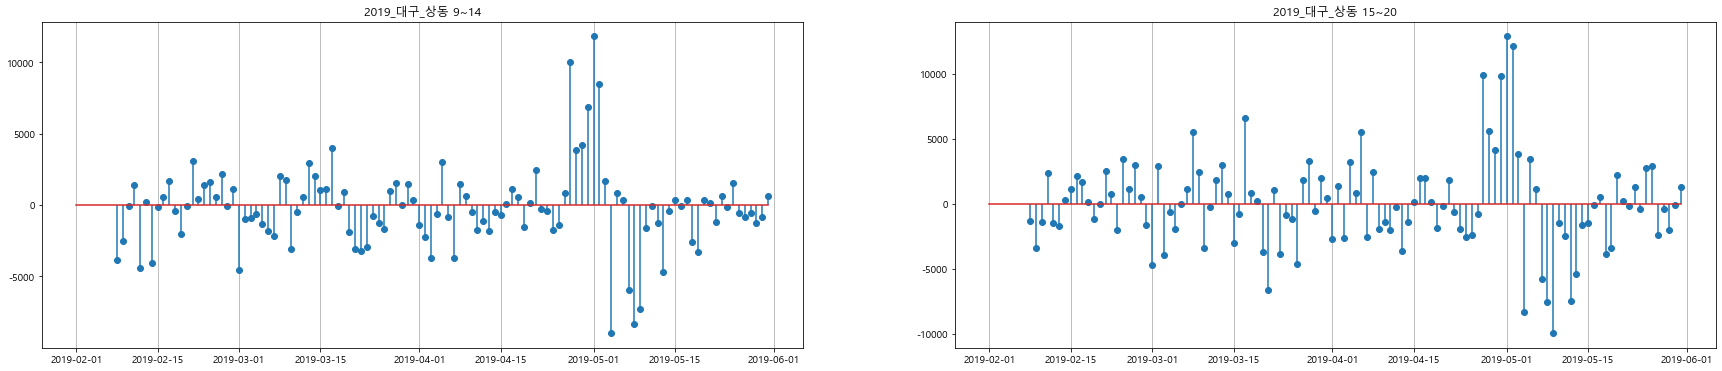

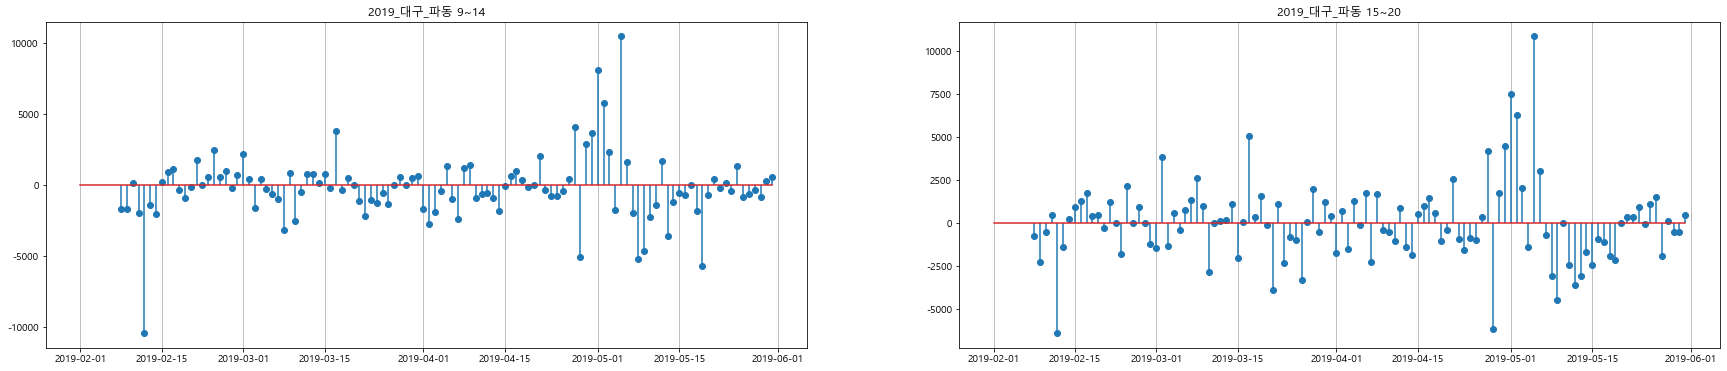

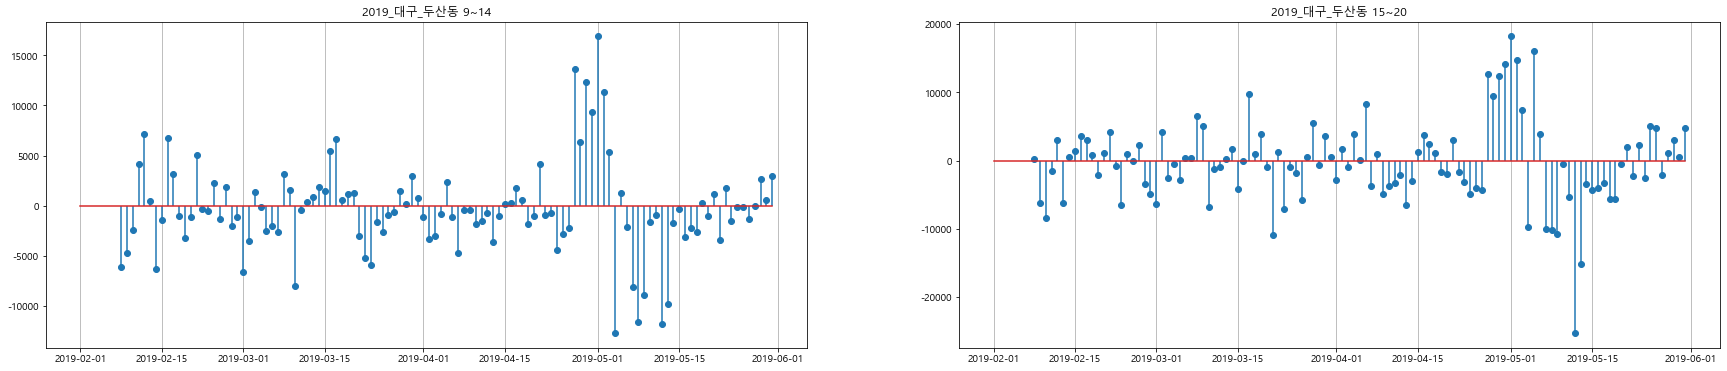

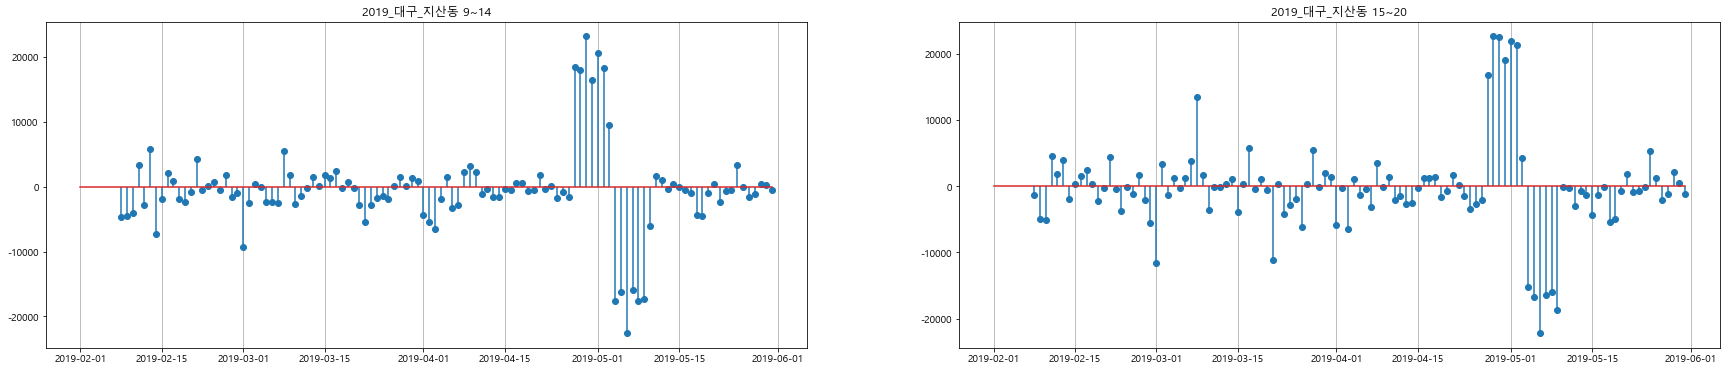

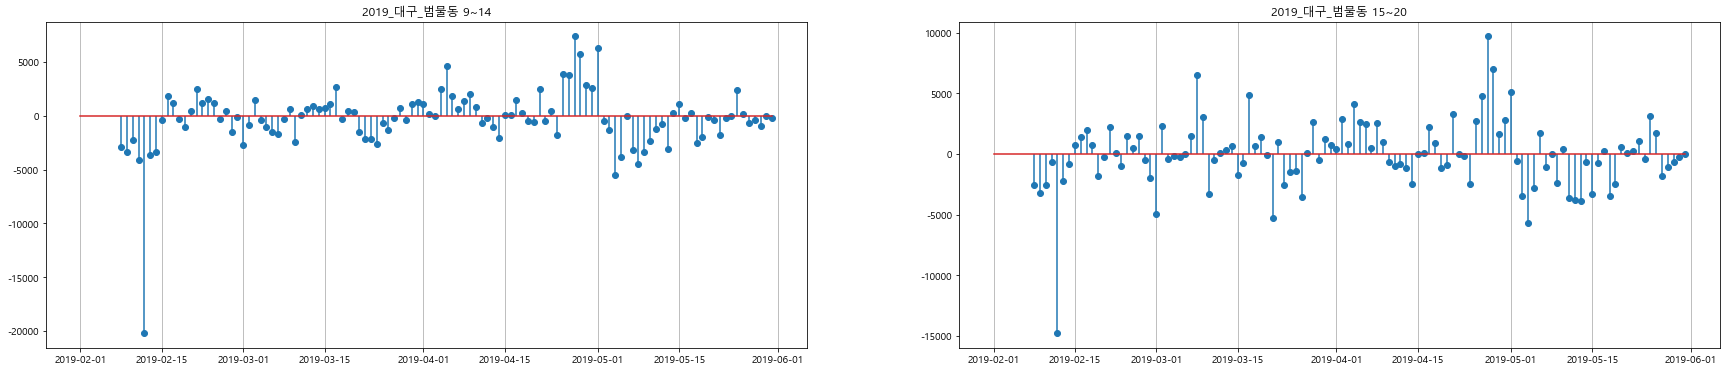

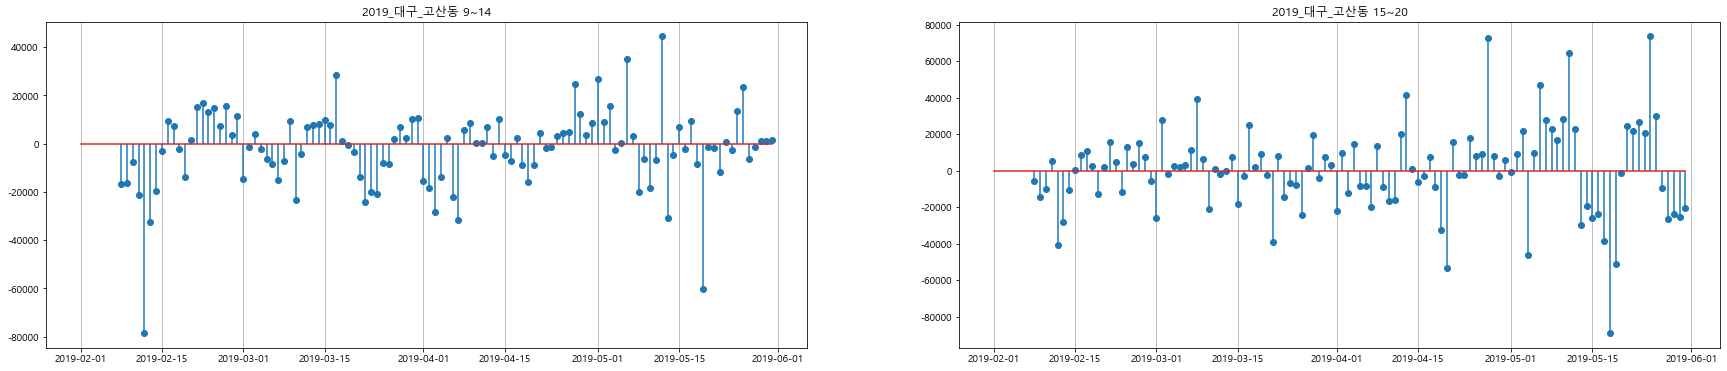

In [34]:
# 대구
processing_plot(sk_2019_d,'2019_대구_')

##### 2020년도 동별 유동인구

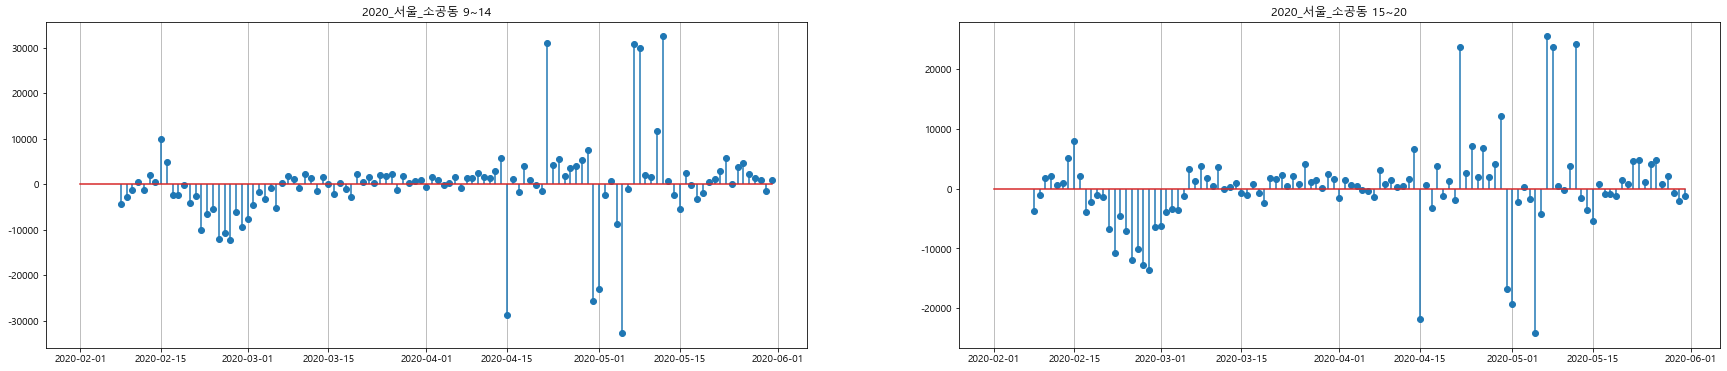

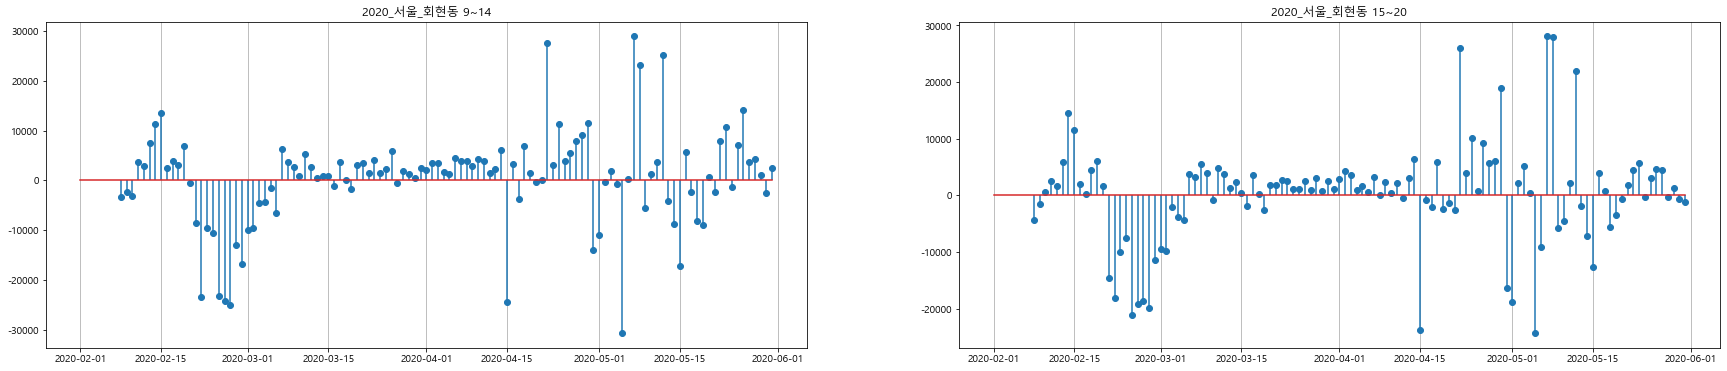

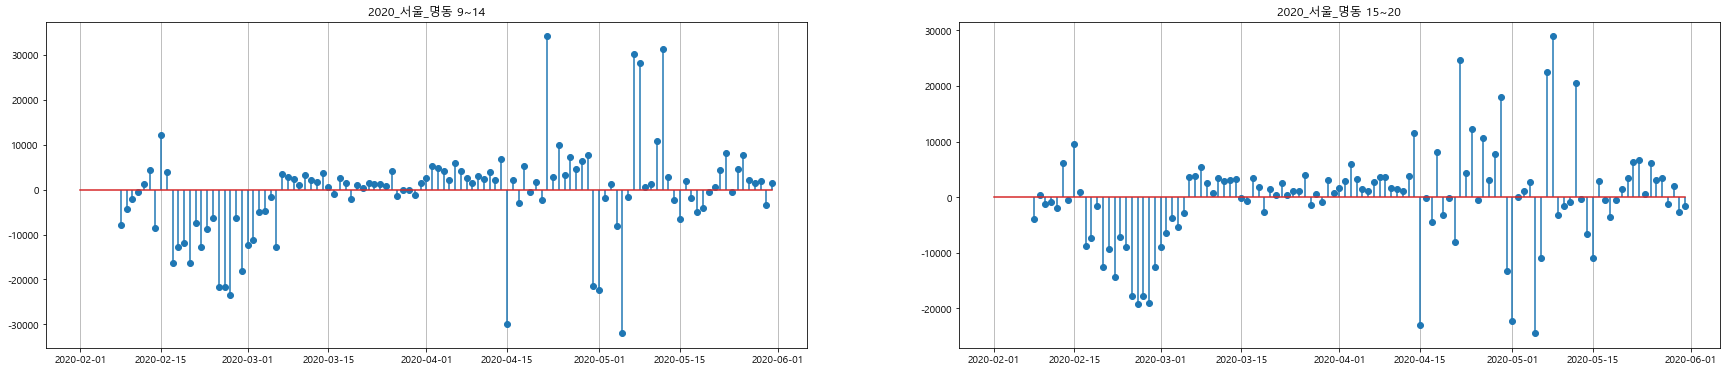

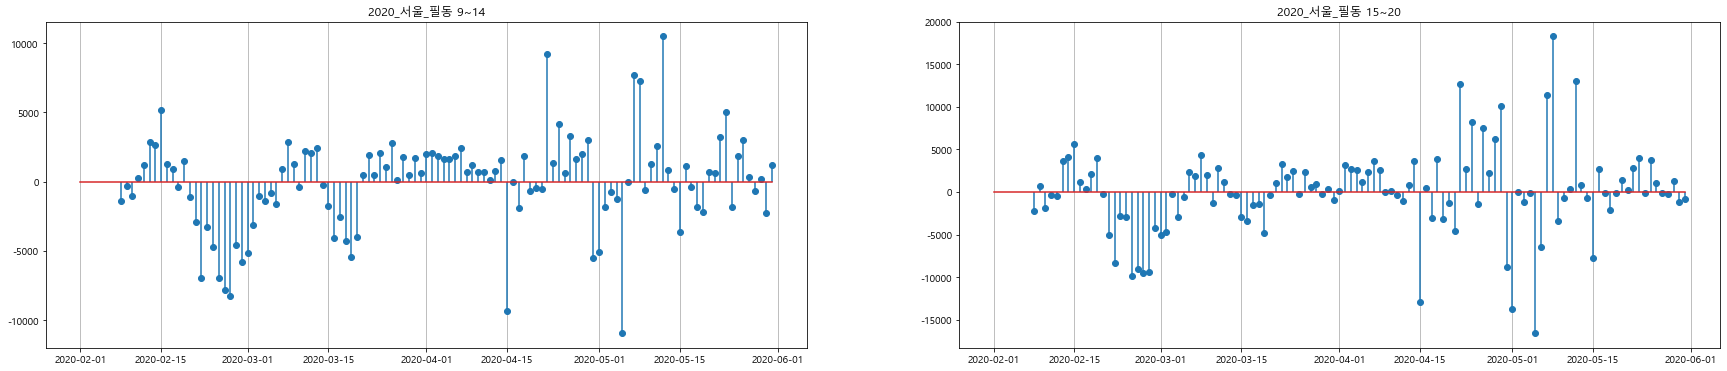

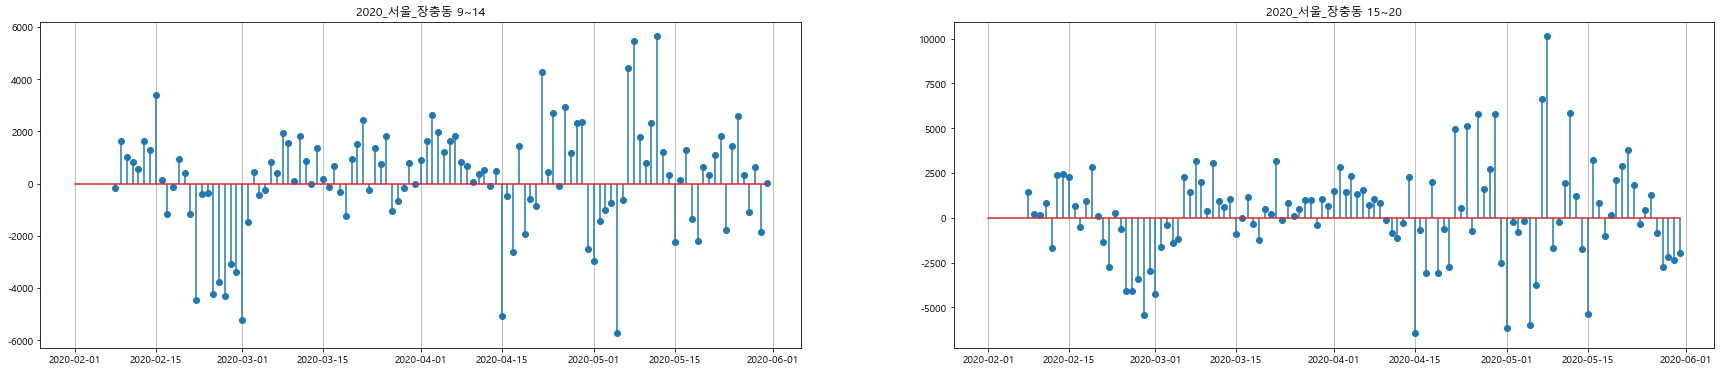

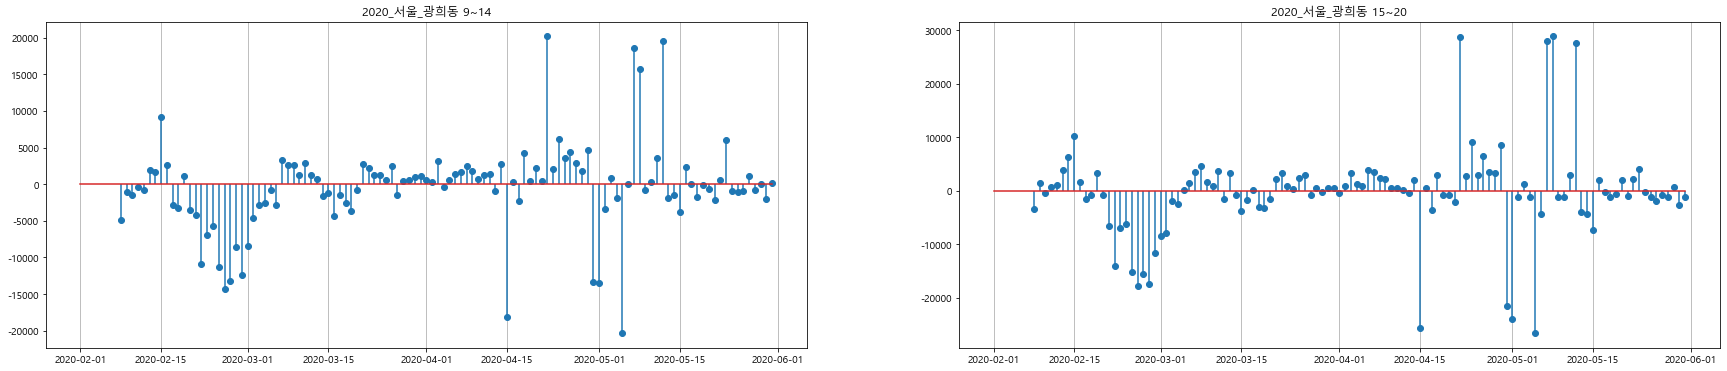

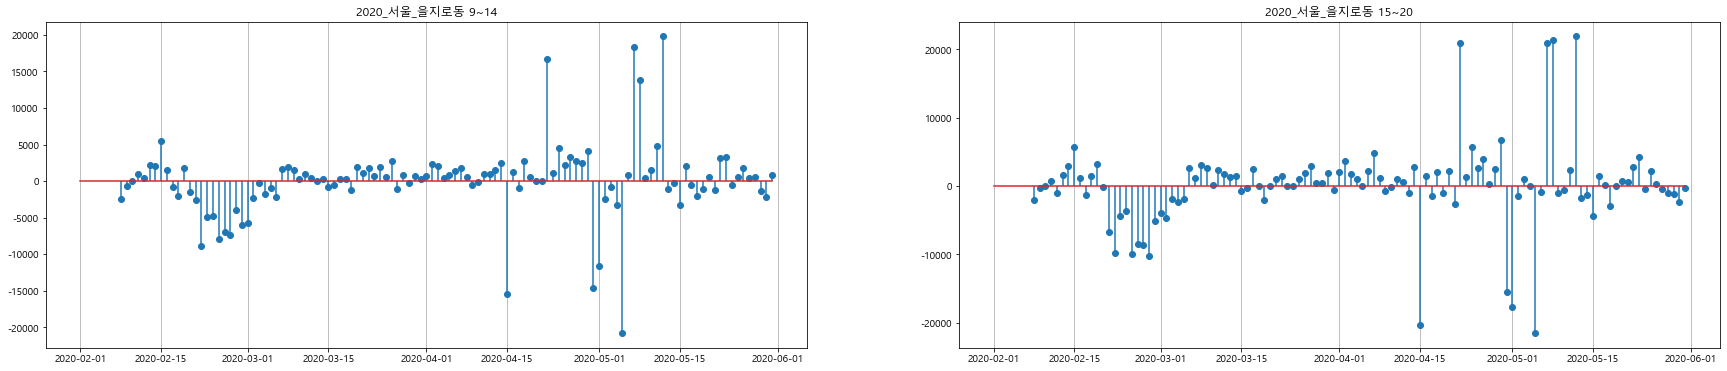

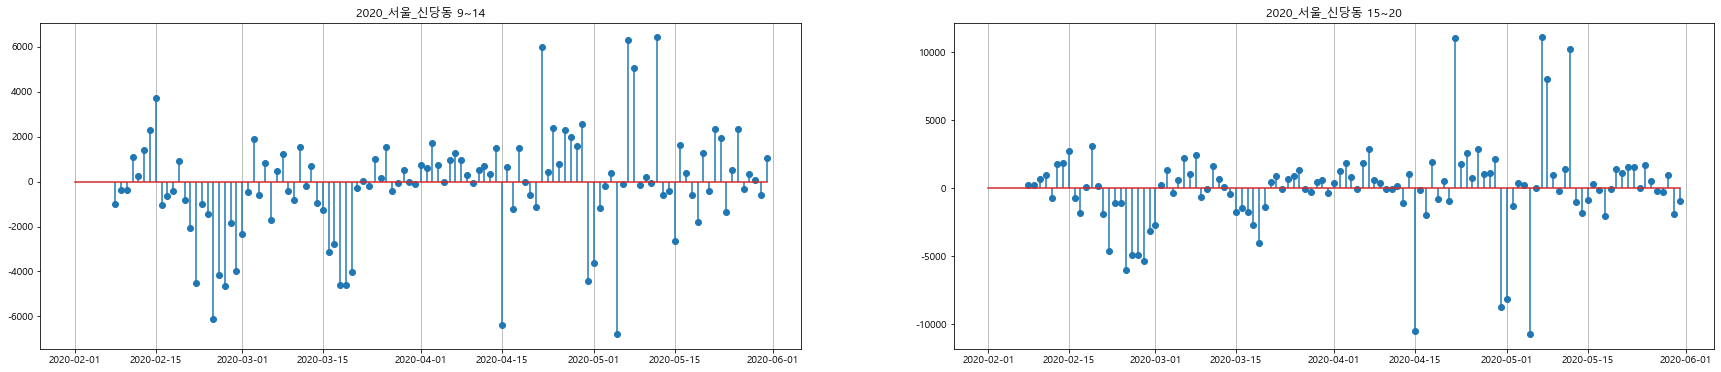

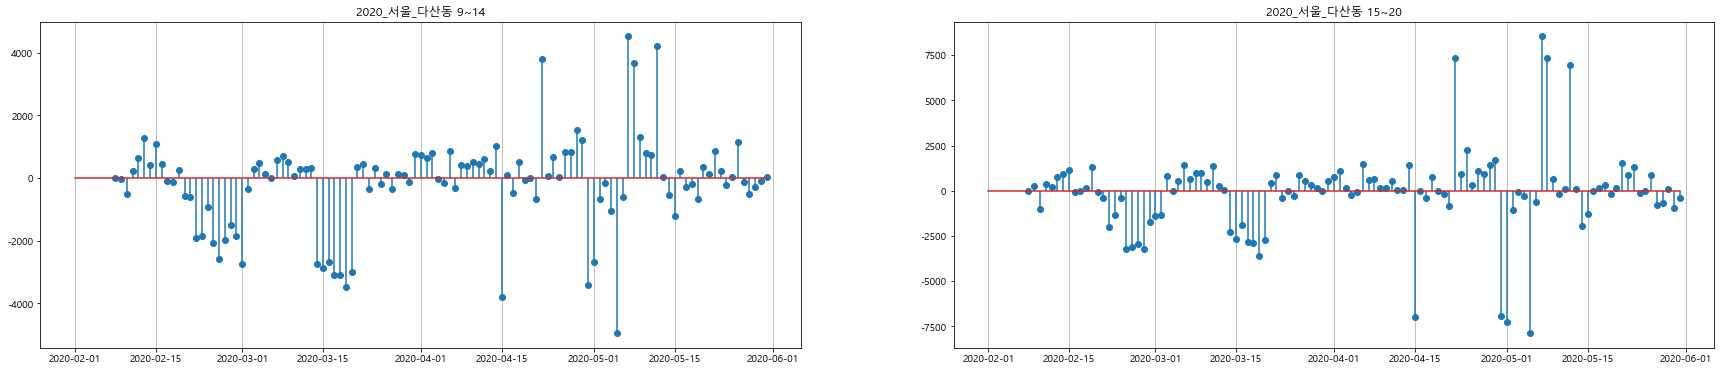

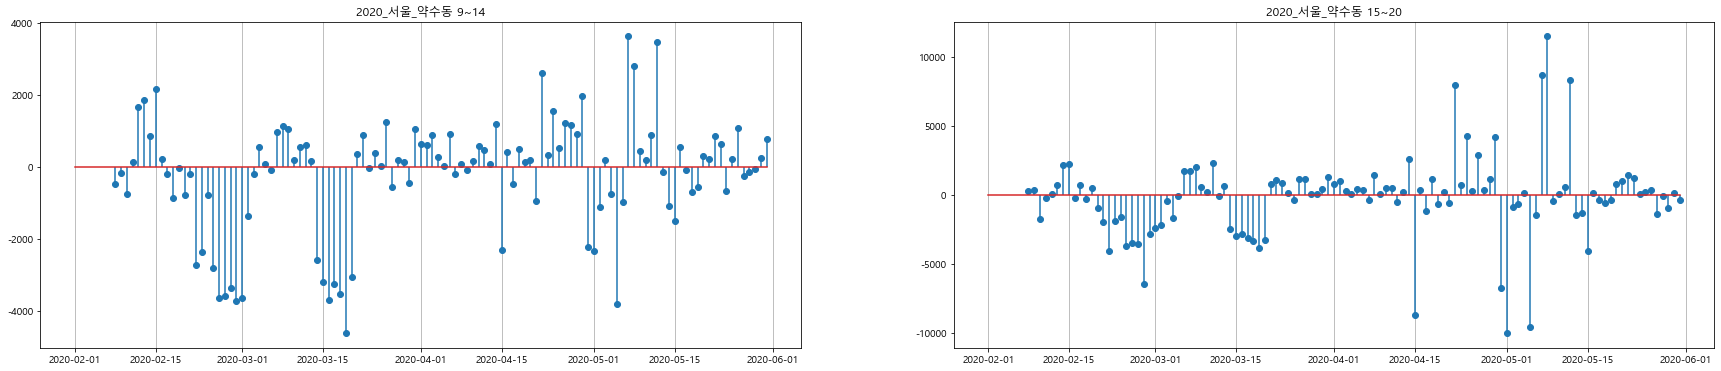

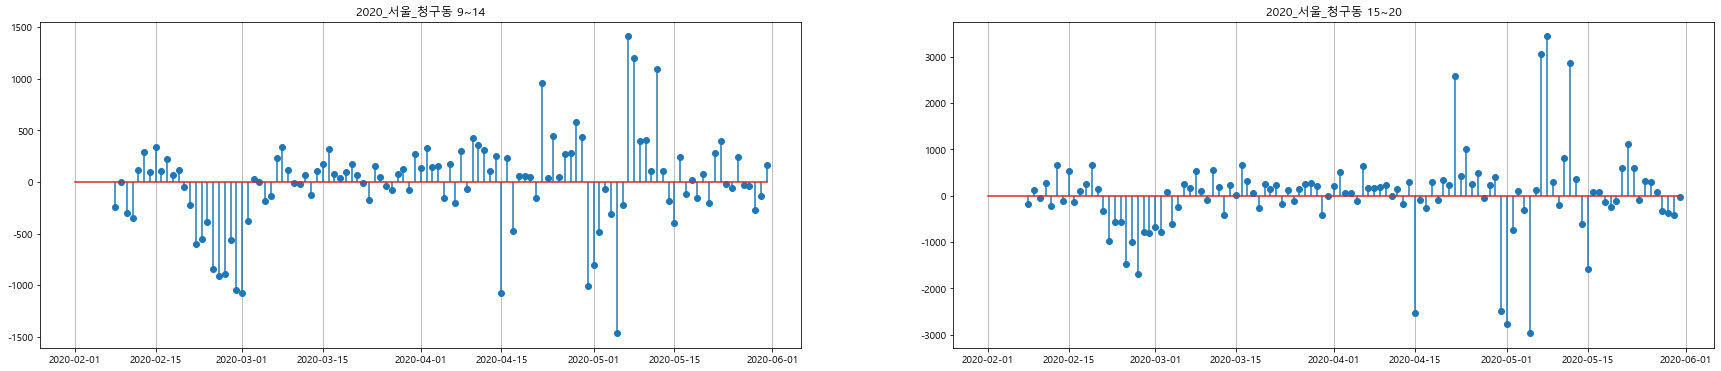

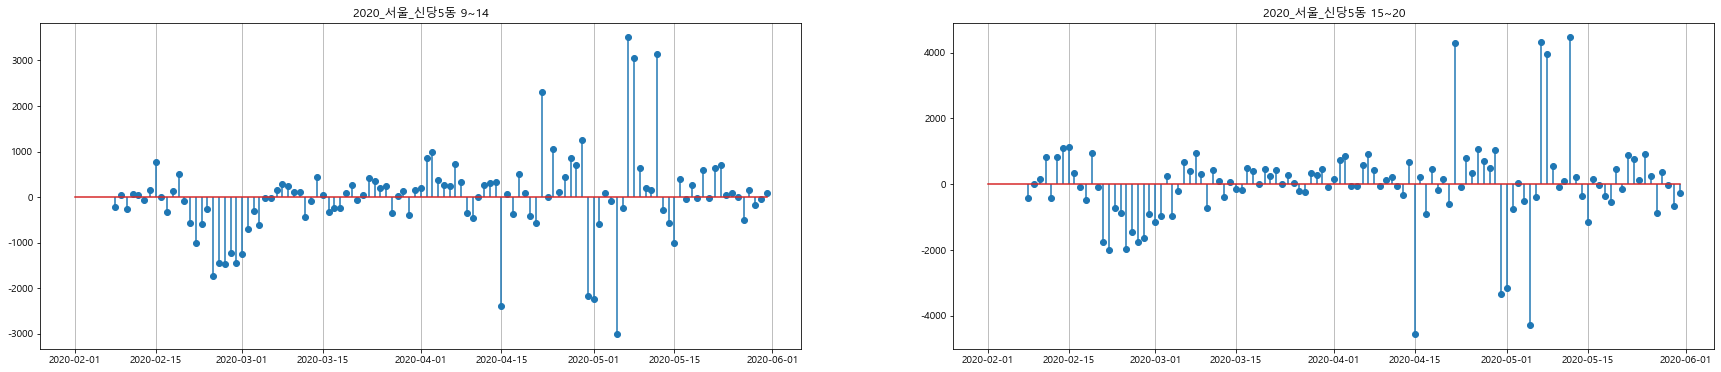

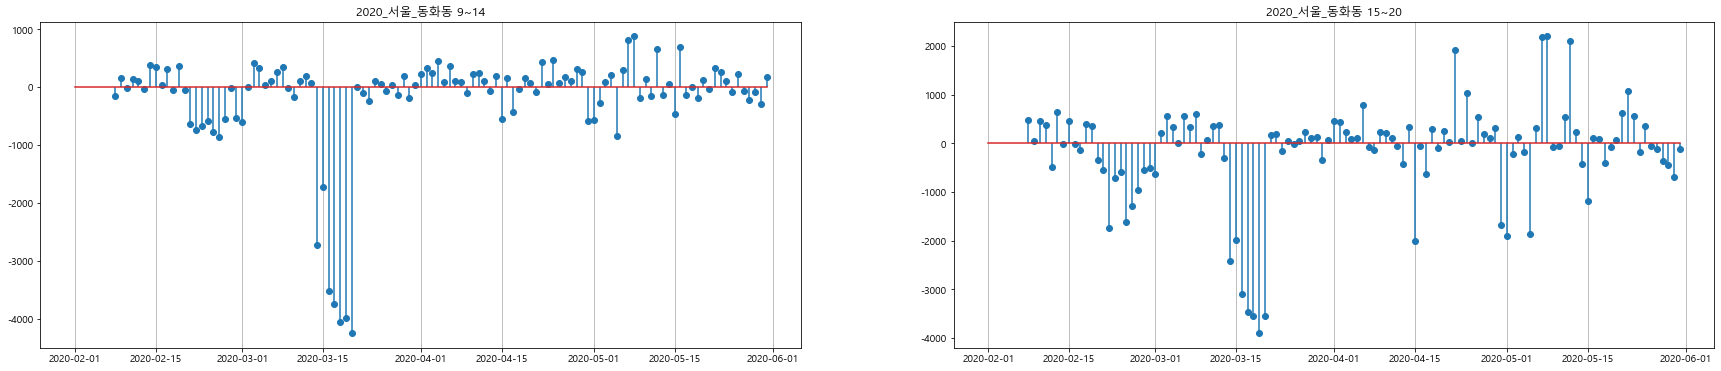

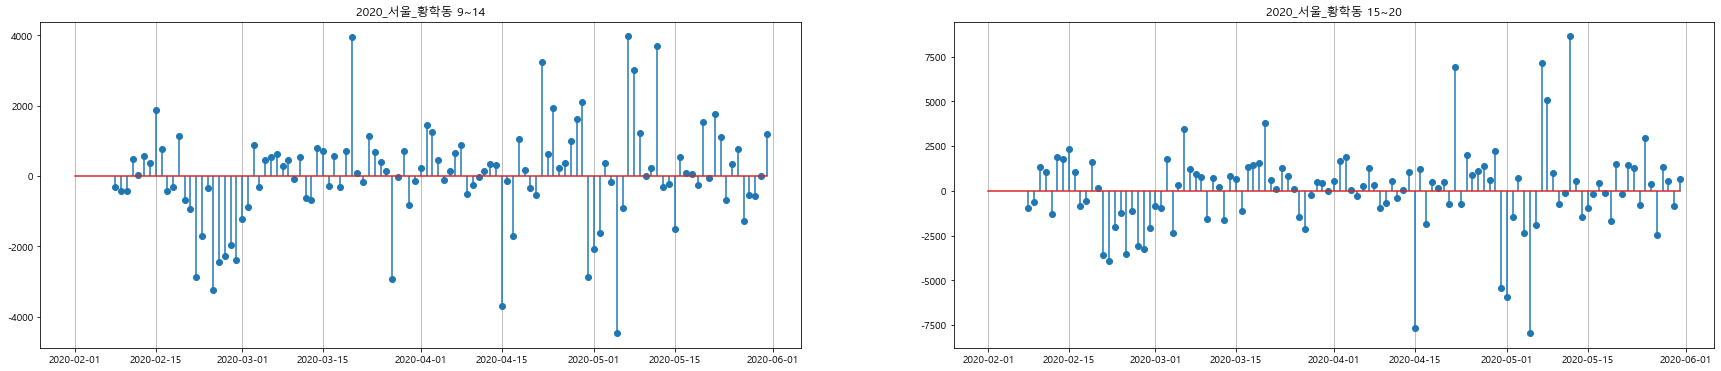

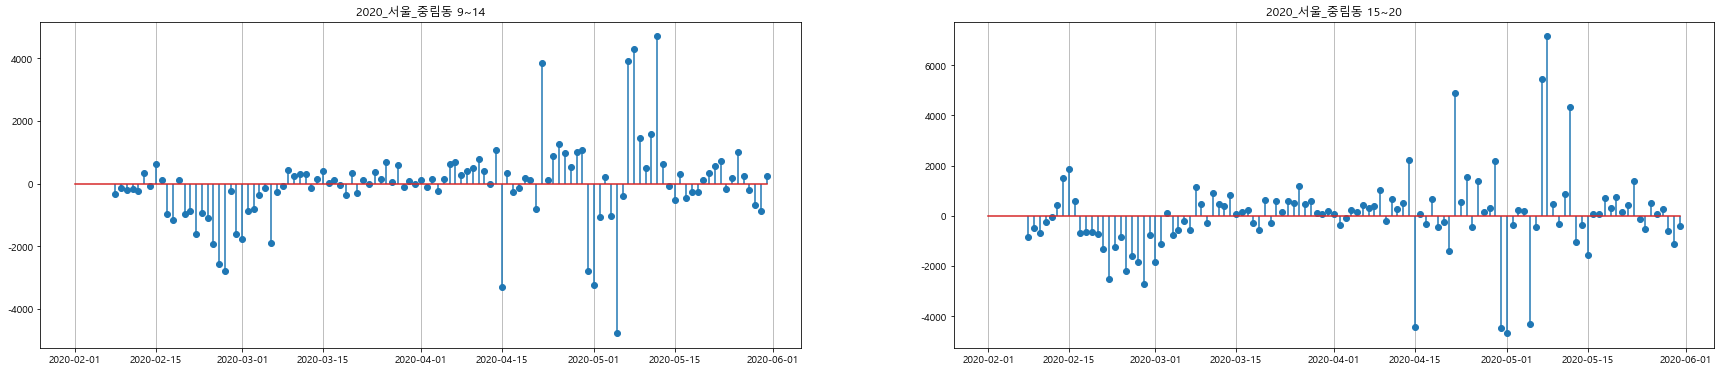

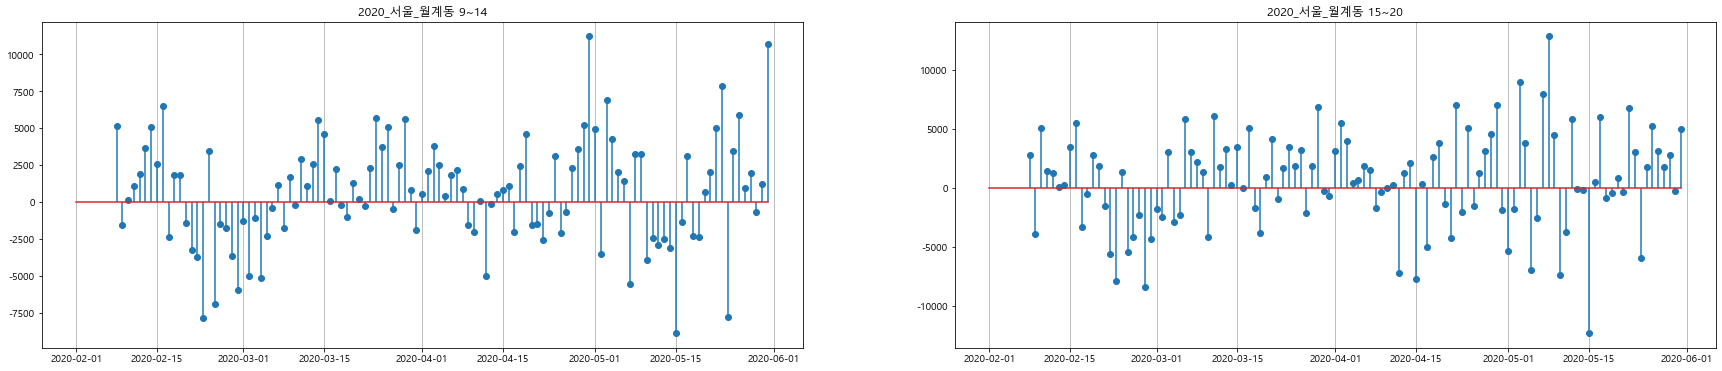

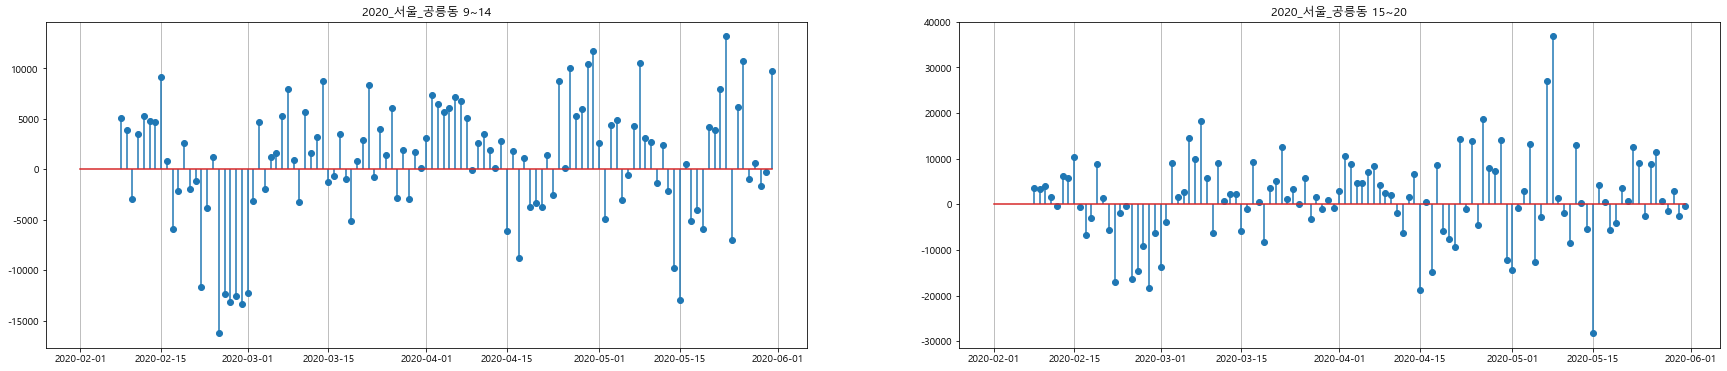

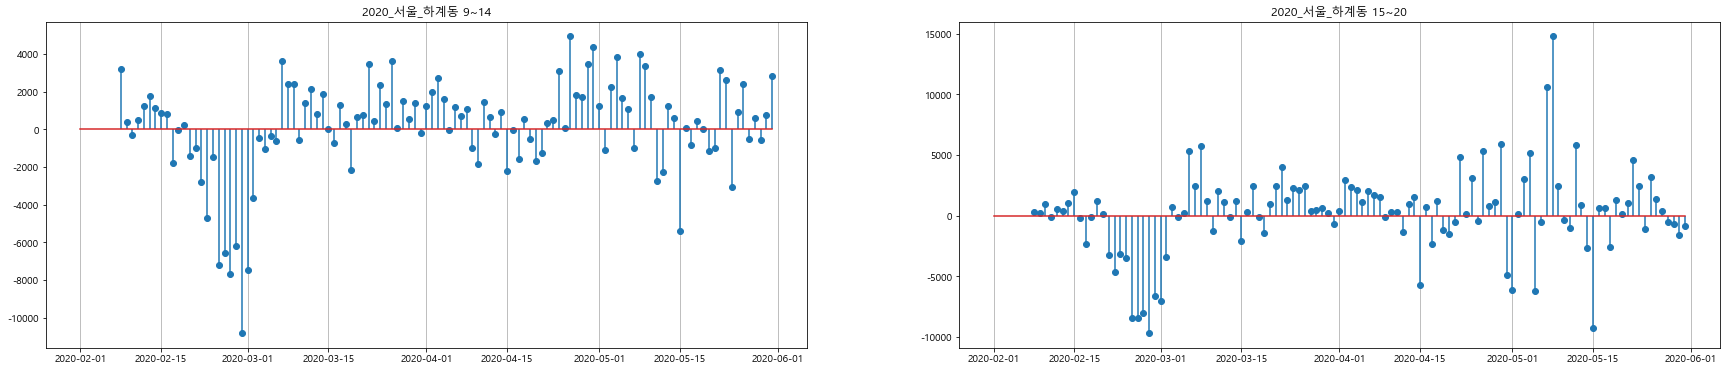

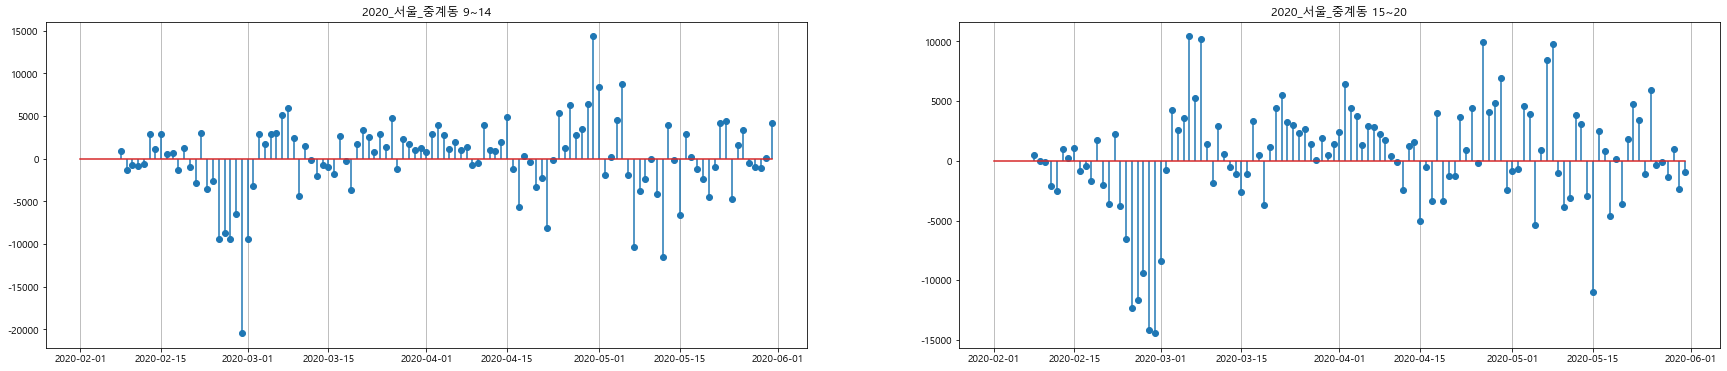

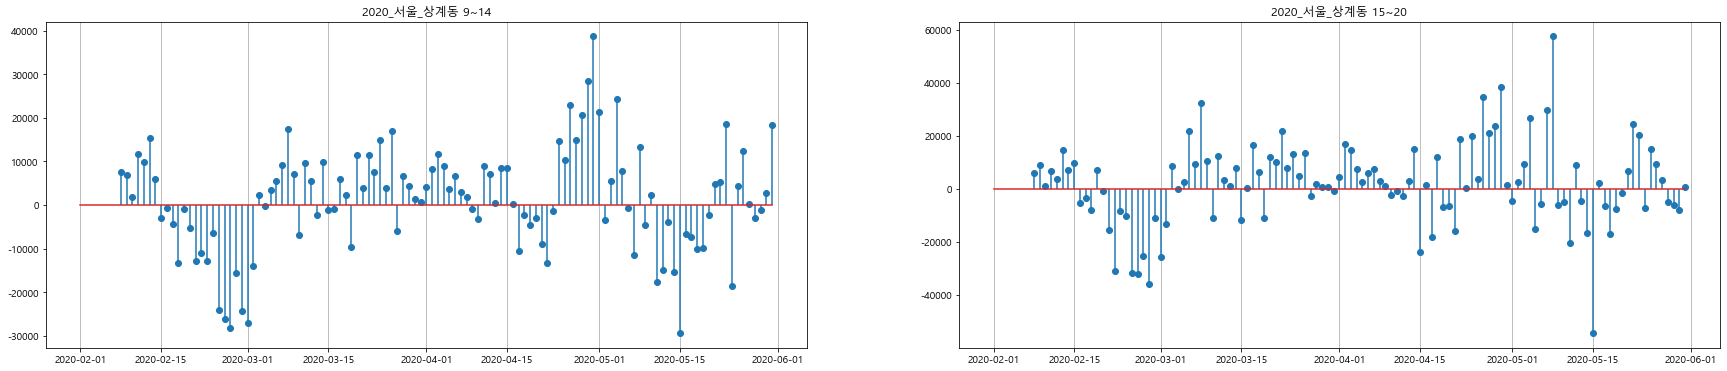

In [35]:
# 서울
processing_plot(sk_2020_s, '2020_서울_')

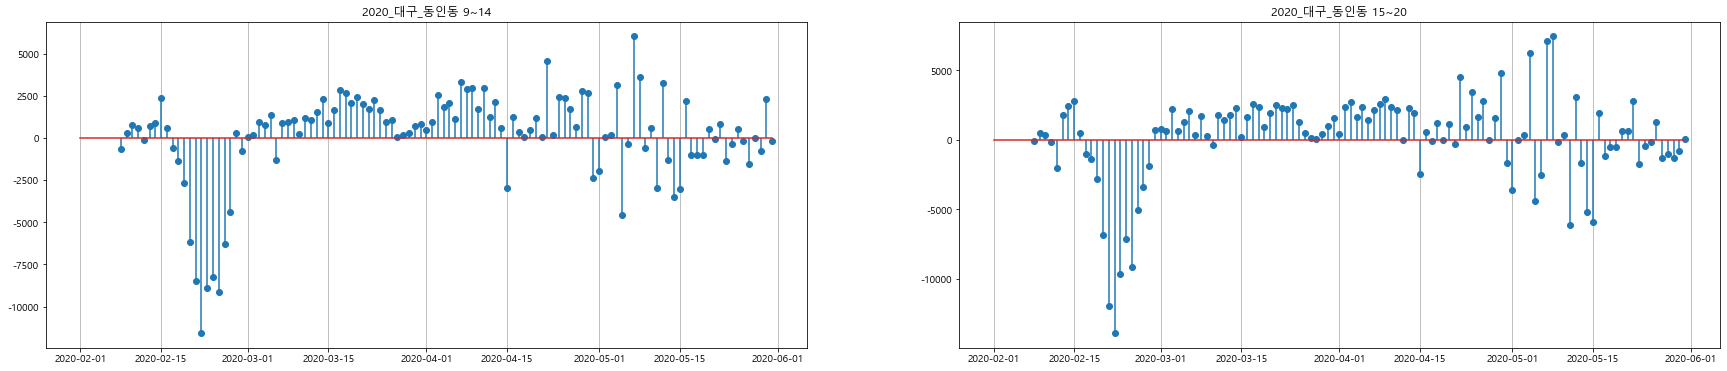

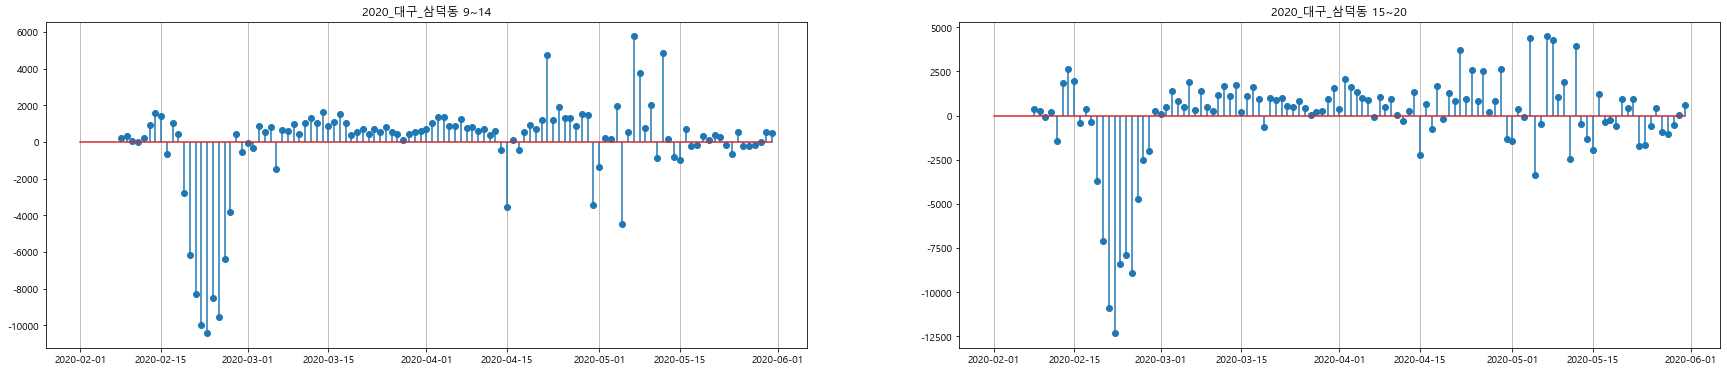

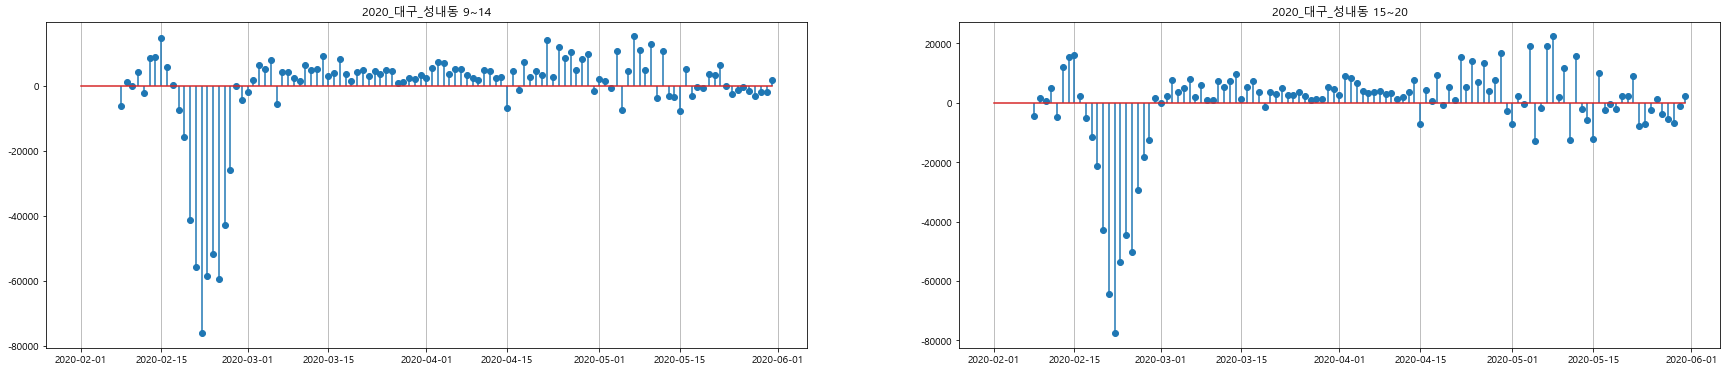

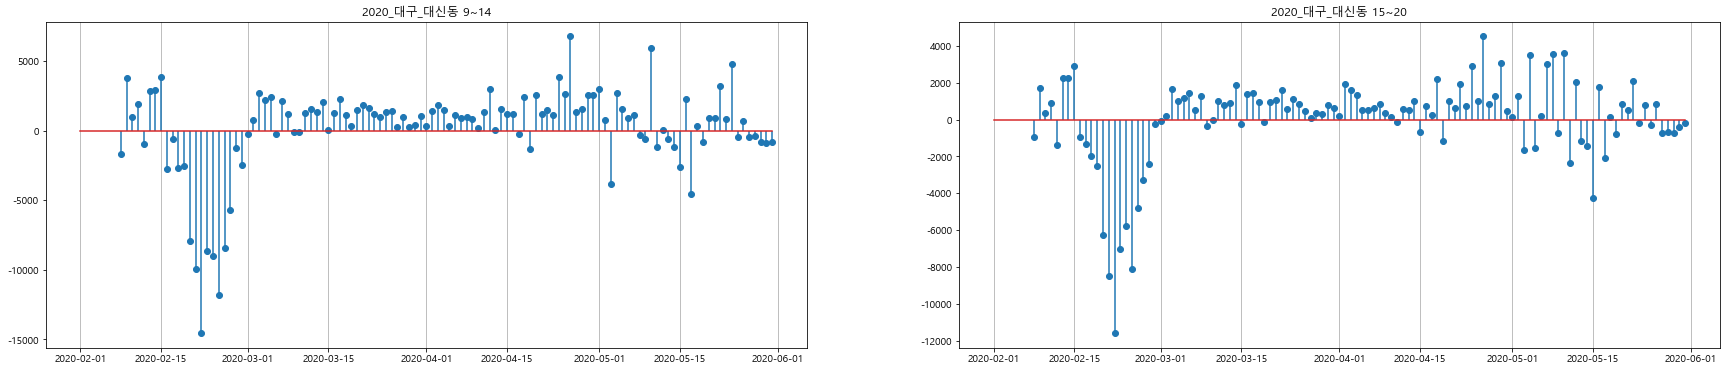

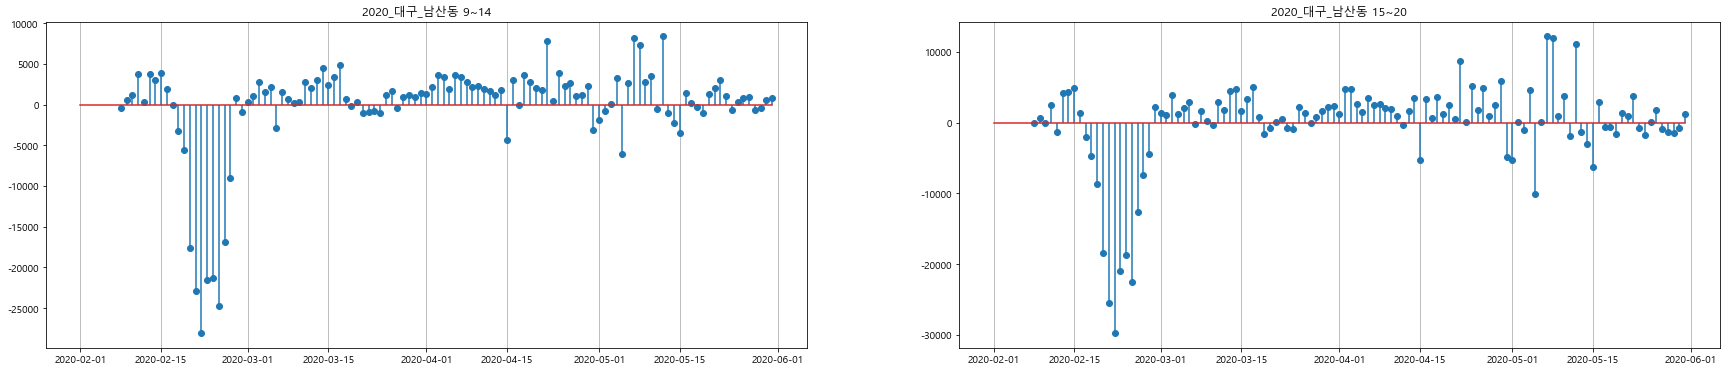

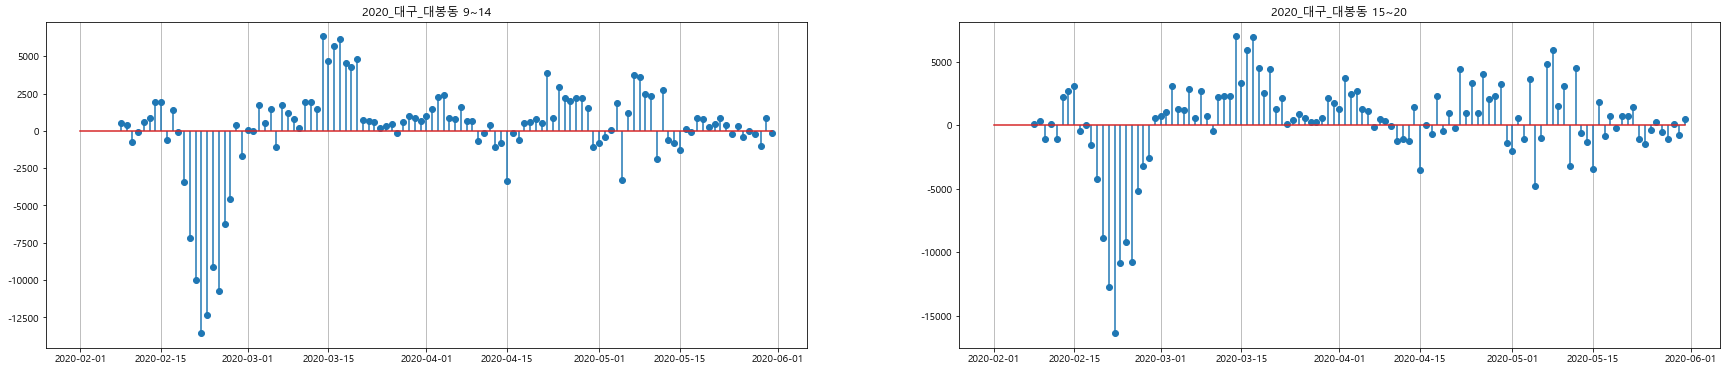

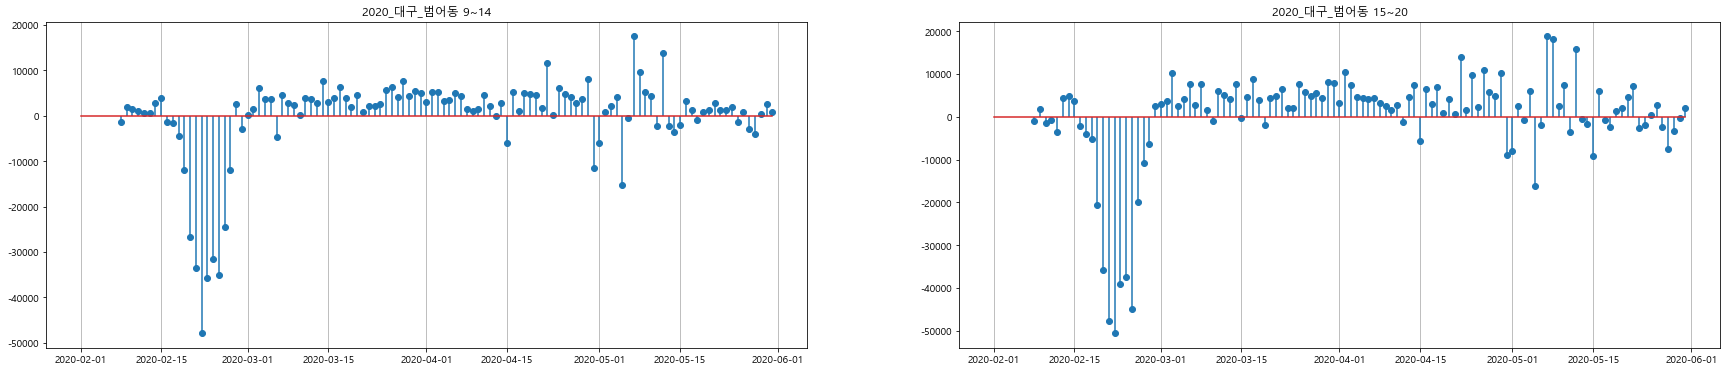

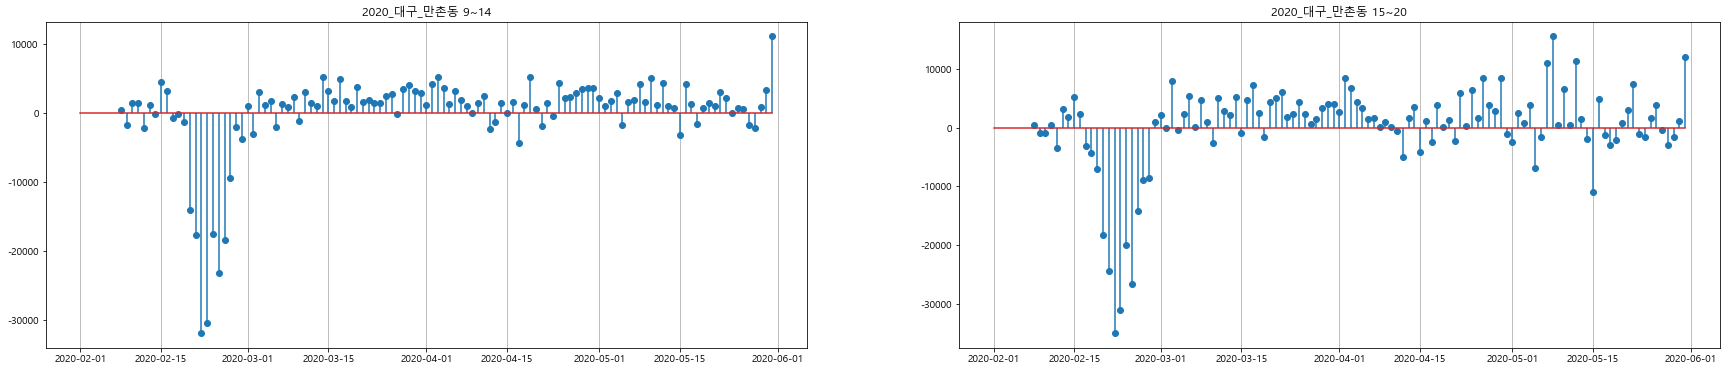

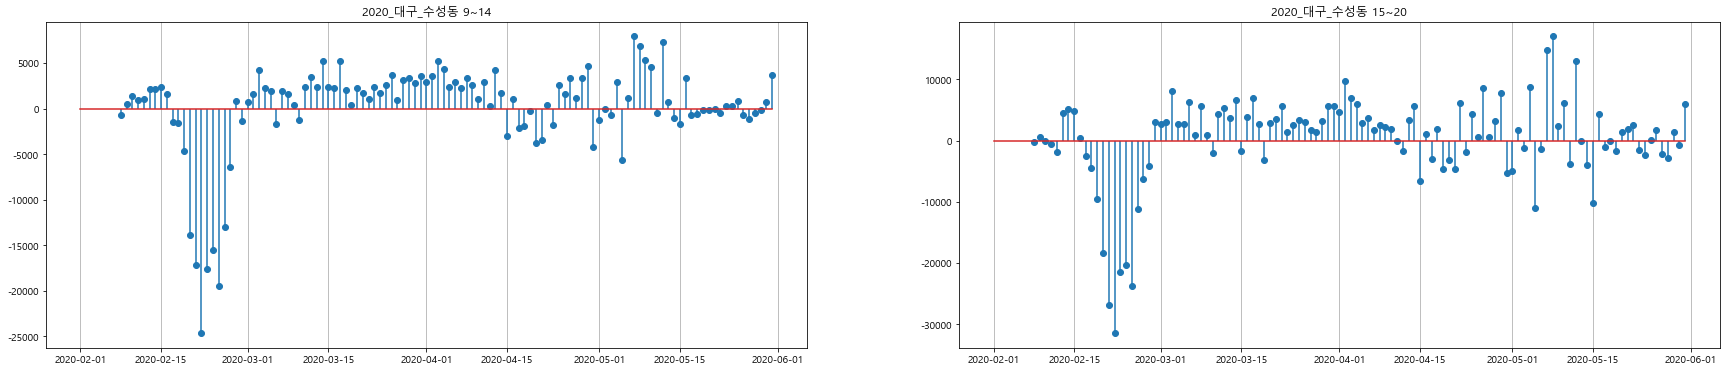

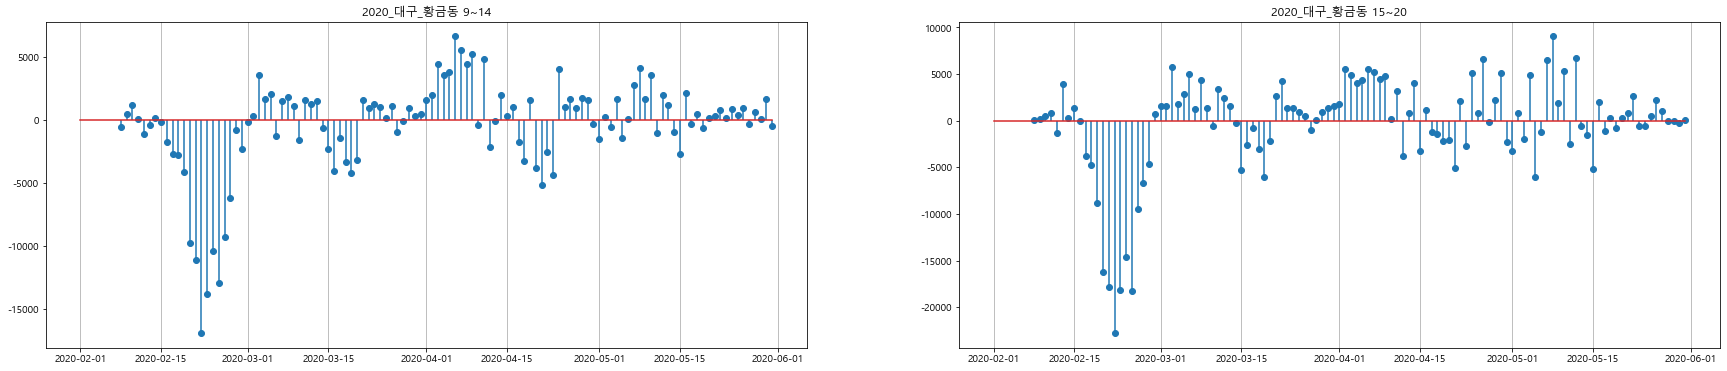

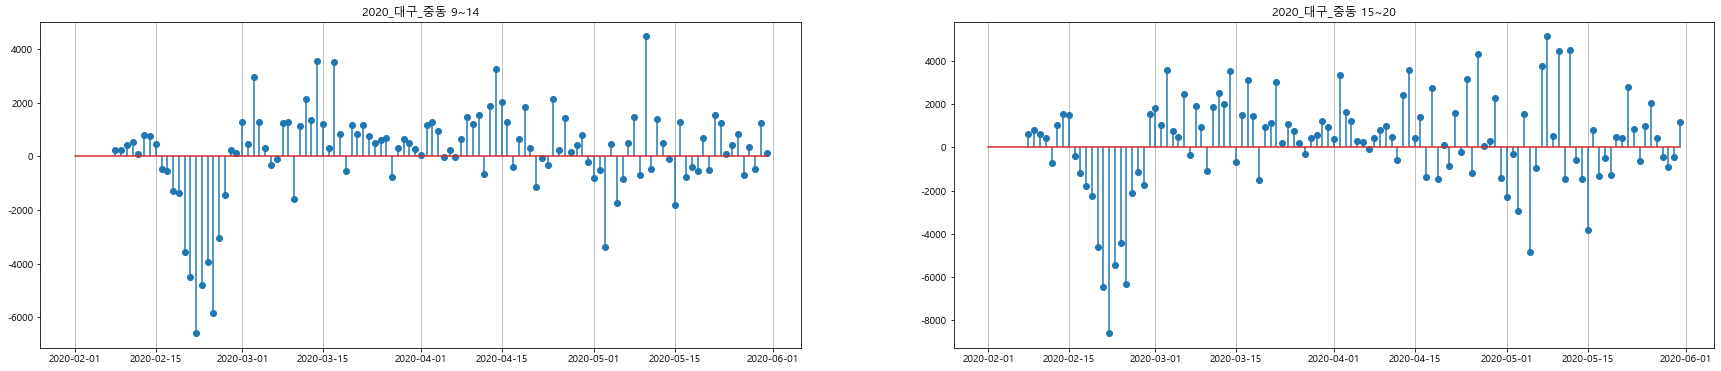

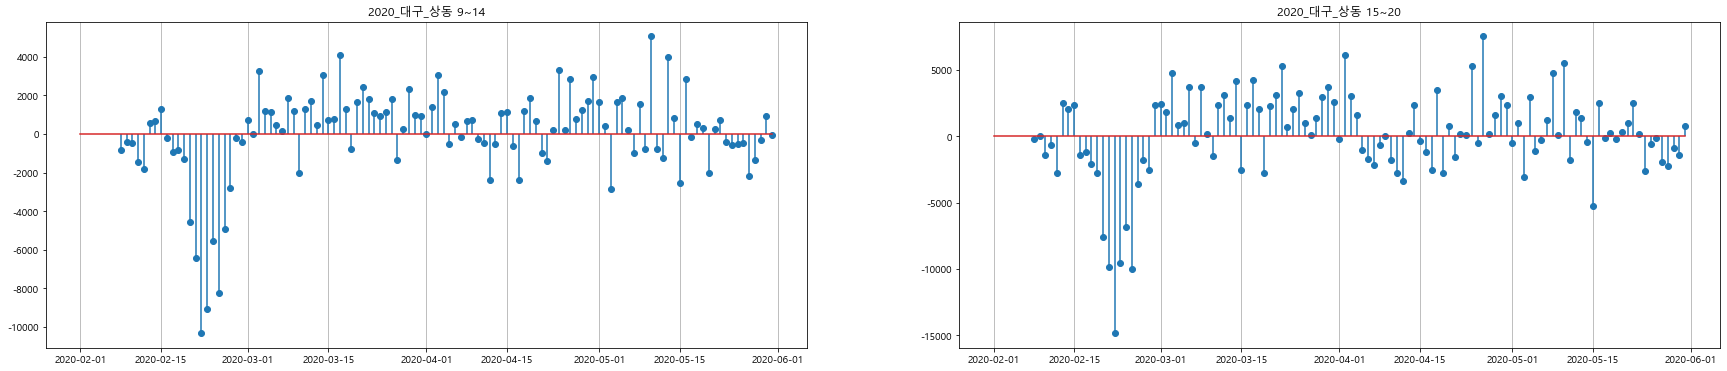

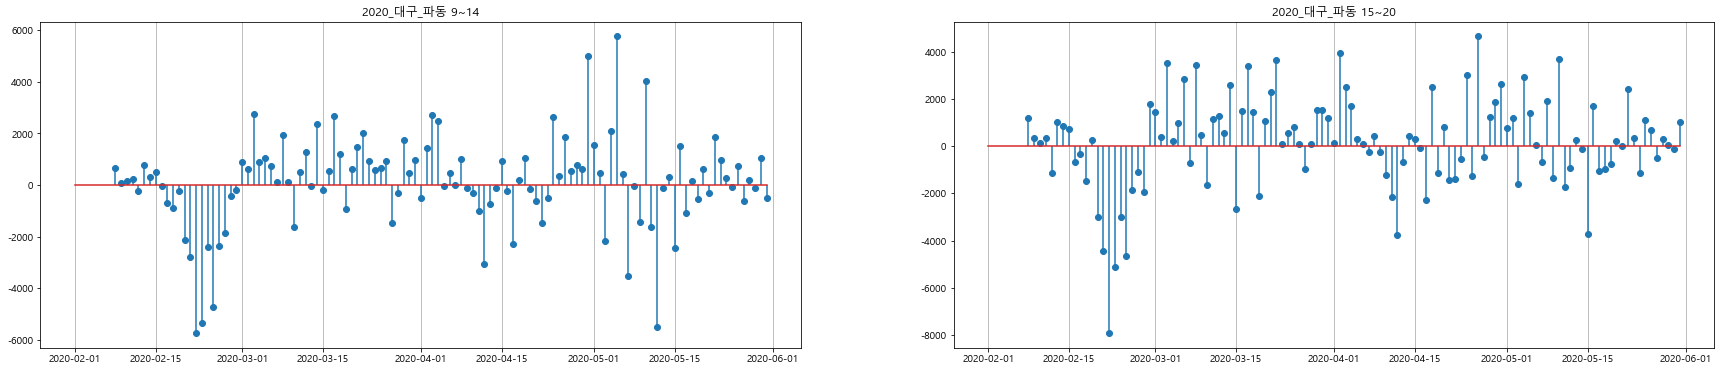

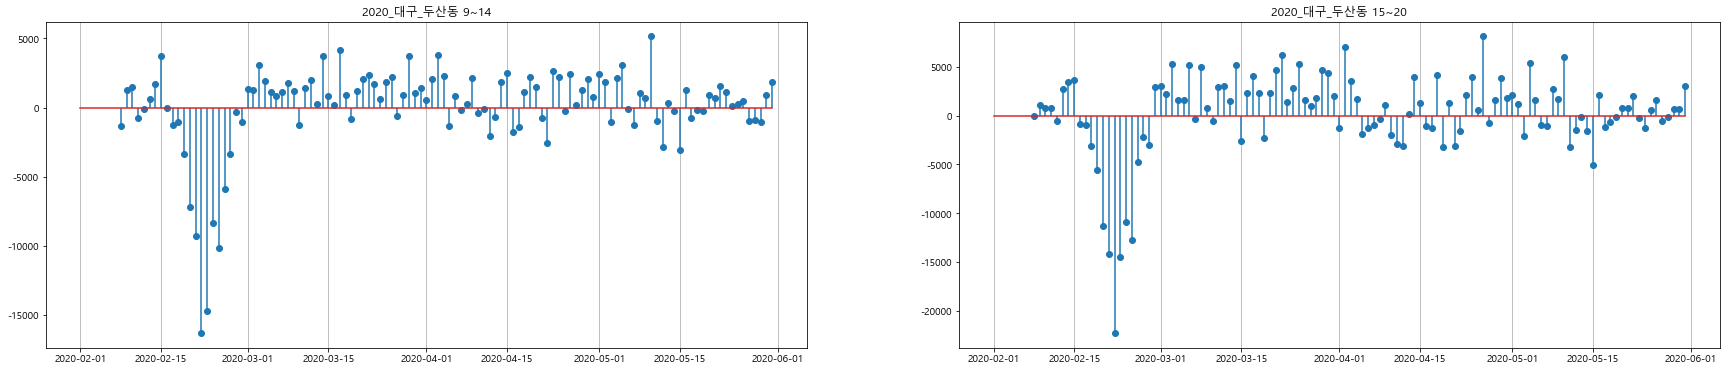

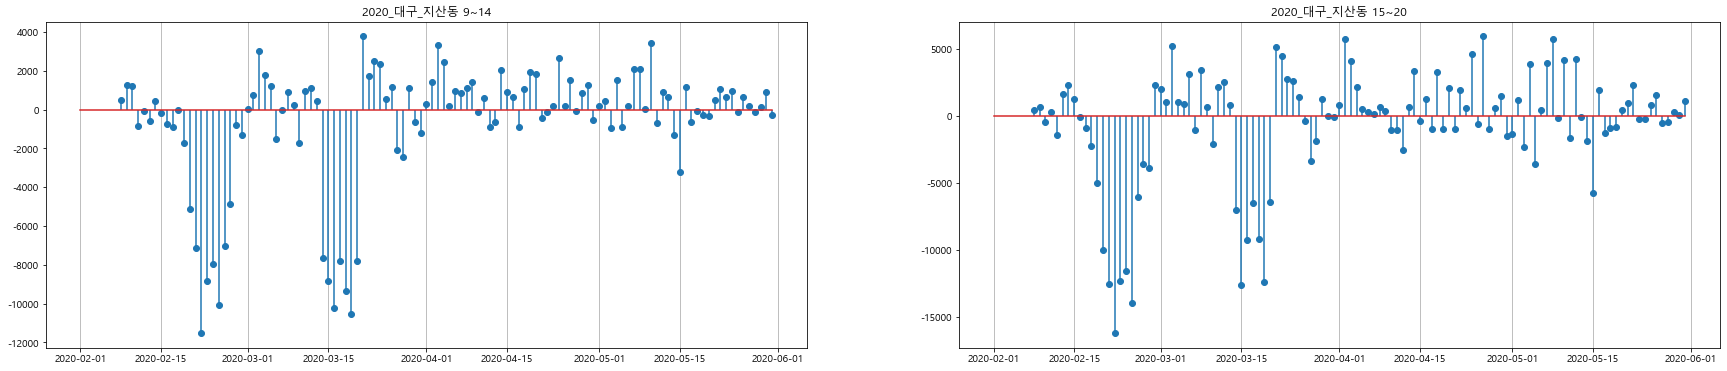

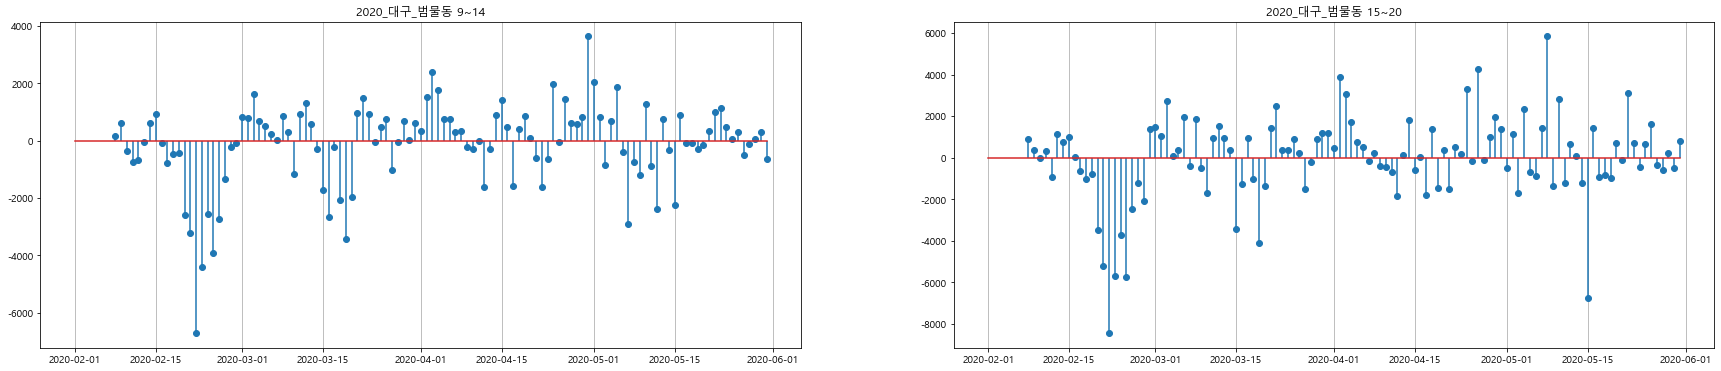

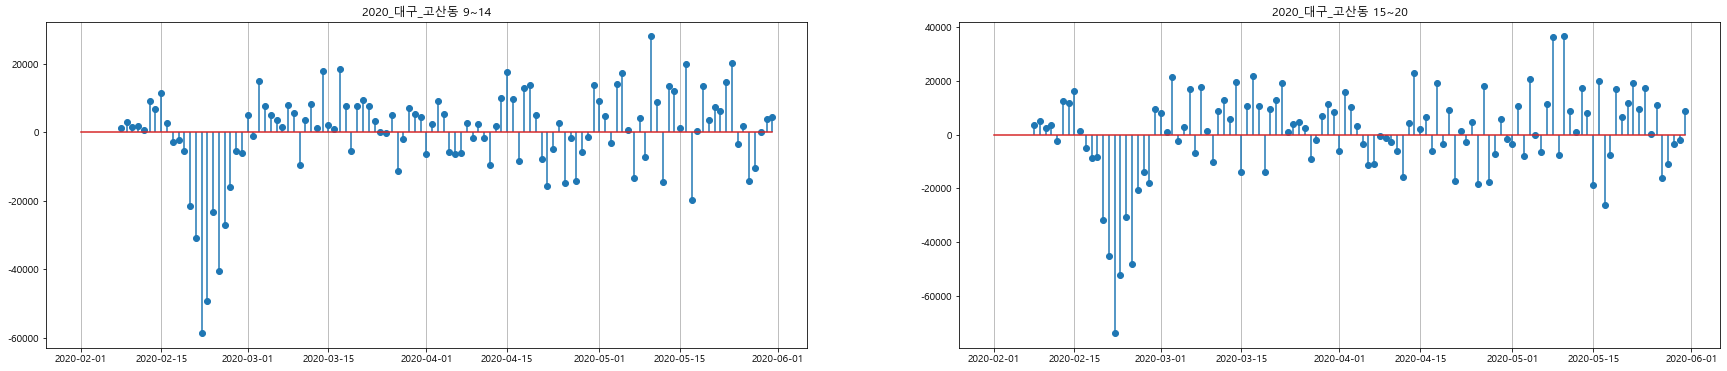

In [36]:
# 대구
processing_plot(sk_2020_d, '2020_대구_')